# 1. Import Data&Libraries #

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
df = pd.read_csv('/Users/melisademir/Desktop/PROJE1/global.csv', encoding="ISO-8859-1", low_memory=False)
df.tail(10)

eventid  iyear  imonth  iday approxdate  extended resolution  \
181681  201712310016   2017      12    31        NaN         0        NaN   
181682  201712310017   2017      12    31        NaN         0        NaN   
181683  201712310018   2017      12    31        NaN         0        NaN   
181684  201712310019   2017      12    31        NaN         0        NaN   
181685  201712310020   2017      12    31        NaN         0        NaN   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country  country_txt  region                  region_txt  \
181681      160  Philippines       5              Southeast Asia   
181682       98        Italy       8              Western Europe   
181683        4  Afghanistan       6                  South Asia   
181684       92        India       6                  South Asia   
181685        4  Afghanistan       6                  South Asia   
181686      182      Somalia      11          Sub-Saharan Africa   
181687      200        Syria      10  Middle East & North Africa   
181688      160  Philippines       5              Southeast Asia   
181689       92        India       6                  South Asia   
181690      160  Philippines       5              Southeast Asia   

              provstate               city   latitude   longitude  \
181681      Maguindanao      Shariff Aguak   6.862806  124.443649   
181682           Marche          Spinetoli  42.888982   13.772795   
181683           Faryab  Kohistan district  35.315467   64.815508   
181684            Assam            Hungrum  25.180162   93.015788   
181685           Faryab            Maymana  35.921051   64.774544   
181686  Middle Shebelle      Ceelka Geelow   2.359673   45.385034   
181687         Lattakia             Jableh  35.407278   35.942679   
181688      Maguindanao           Kubentog   6.900742  124.437908   
181689          Manipur             Imphal  24.798346   93.940430   
181690      Maguindanao      Cotabato City   7.209594  124.241966   

        specificity  vicinity  \
181681          1.0         0   
181682          1.0         0   
181683          3.0         0   
181684          2.0         0   
181685          1.0         0   
181686          2.0         0   
181687          1.0         1   
181688          2.0         0   
181689          1.0         0   
181690          1.0         0   

                                                 location  \
181681  The incident occurred in the Poblacion Mother ...   
181682  The incident occurred in the Ascoli Piceno dis...   
181683                                                NaN   
181684  The incident occurred in the Dima Hasao distri...   
181685                                                NaN   
181686     The incident occurred near the town of Balcad.   
181687     The incident occurred at the Humaymim Airport.   
181688  The incident occurred in the Datu Hoffer distr...   
181689  The incident occurred in the Mantripukhri neig...   
181690                                                NaN   

                                                  summary  crit1  crit2  \
181681  12/31/2017: A roadside bomb detonated targetin...      1      1   
181682  12/31/2017: Assailants set fire to a migrants'...      1      1   
181683  12/31/2017: Assailants attacked the house of a...      1      1   
181684  12/31/2017: Assailants abducted Prafulla Phuka...      1      1   
181685  12/31/2017: An explosive device detonated at a...      1      1   
181686  12/31/2017: Assailants opened fire on a Somali...      1      1   
181687  12/31/2017: Assailants launched mortars at the...      1      1   
181688  12/31/2017: 

In [2]:
df.shape

(181691, 135)

# 2. Getting Data Ready #

In [3]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country':'country1','country_txt':'Country','region':'Region1','region_txt':'Region','attacktype1':'attacktype1','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [4]:
terror=df[['Year','Month','Day','Country','country1','Region','Region1', 'city','AttackType','attacktype1','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror

Year  Month  Day             Country  country1  \
0       1970      7    2  Dominican Republic        58   
1       1970      0    0              Mexico       130   
2       1970      1    0         Philippines       160   
3       1970      1    0              Greece        78   
4       1970      1    0               Japan       101   
...      ...    ...  ...                 ...       ...   
181686  2017     12   31             Somalia       182   
181687  2017     12   31               Syria       200   
181688  2017     12   31         Philippines       160   
181689  2017     12   31               India        92   
181690  2017     12   31         Philippines       160   

                             Region  Region1           city  \
0       Central America & Caribbean        2  Santo Domingo   
1                     North America        1    Mexico city   
2                    Southeast Asia        5        Unknown   
3                    Western Europe        8         Athens   
4                         East Asia        4        Fukouka   
...                             ...      ...            ...   
181686           Sub-Saharan Africa       11  Ceelka Geelow   
181687   Middle East & North Africa       10         Jableh   
181688               Southeast Asia        5       Kubentog   
181689                   South Asia        6         Imphal   
181690               Southeast Asia        5  Cotabato City   

                            AttackType  attacktype1  Killed  Wounded  \
0                        Assassination            1     1.0      0.0   
1          Hostage Taking (Kidnapping)            6     0.0      0.0   
2                        Assassination            1     1.0      0.0   
3                    Bombing/Explosion            3     NaN      NaN   
4       Facility/Infrastructure Attack            7     NaN      NaN   
...                                ...          ...     ...      ...   
181686                   Armed Assault            2     1.0      2.0   
181687               Bombing/Explosion            3     2.0      7.0   
181688  Facility/Infrastructure Attack            7     0.0      0.0   
181689               Bombing/Explosion            3     0.0      0.0   
181690               Bombing/Explosion            3     0.0      0.0   

                         Target  \
0                  Julio Guzman   
1       Nadine Chaval, daughter   
2                      Employee   
3                  U.S. Embassy   
4                U.S. Consulate   
...                         ...   
181686               Checkpoint   
181687         Hmeymim Air Base   
181688                   Houses   
181689                   Office   
181690                  Unknown   

                                                  Summary  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  12/31/2017: Assailants opened fire on a Somali...   
181687  12/31/2017: Assailants launched mortars at the...   
181688  12/31/2017: Assailants set fire to houses in K...   
181689  12/31/2017: Assailants threw a grenade at a Fo...   
181690  12/31/2017: An explosive device was discovered...   

                                             Group  \
0                                           MANO-D   
1               23rd of September Communist League   
2                                          Unknown   
3                                          Unknown   
4                                          Unknown   
...                                            ...   
181686                                  Al-Shabaab   
181687                           Muslim extremists   
181688  Bangsamoro Islamic Freedom Movement (BIFM

In [5]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   country1     181691 non-null  int64  
 5   Region       181691 non-null  object 
 6   Region1      181691 non-null  int64  
 7   city         181257 non-null  object 
 8   AttackType   181691 non-null  object 
 9   attacktype1  181691 non-null  int64  
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(2), int64(6),

In [6]:
terror['Day'].apply(np.floor)
terror['Month'].apply(np.floor)
terror['Killed'].apply(np.floor)
terror['Day'].apply(np.floor)
#I realized there are a couple of decimal numbers in the Day column. Then I fixed like this.

0          2.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
181686    31.0
181687    31.0
181688    31.0
181689    31.0
181690    31.0
Name: Day, Length: 181691, dtype: float64

In [7]:
terror.describe(include=['O'])

Country                      Region     city         AttackType  \
count   181691                      181691   181257             181691   
unique     205                          12    36674                  9   
top       Iraq  Middle East & North Africa  Unknown  Bombing/Explosion   
freq     24636                       50474     9775              88255   

           Target                                            Summary    Group  \
count      181055                                             115562   181691   
unique      86006                                             112492     3537   
top     Civilians  09/00/2016: Sometime between September 18, 201...  Unknown   
freq         6461                                                100    82782   

                        Target_type Weapon_type   Motive  
count                        181691      181691    50561  
unique                           22          12    14490  
top     Private Citizens & Property  Explosives  Unknown  
freq                          43511       92426    14889

In [8]:
terror['attacktype1'] = pd.Categorical(terror.attacktype1)

In [9]:
terror['Region1'] = pd.Categorical(terror.Region1)

In [10]:
terror['country1'] = pd.Categorical(terror.country1)

In [11]:
terror['Country'] = pd.Categorical(terror.Country)

In [12]:
terror['Region'] = pd.Categorical(terror.Region)

In [13]:
terror['city'] = pd.Categorical(terror.city)

In [14]:
terror['AttackType'] = pd.Categorical(terror.AttackType)

In [15]:
terror['Group'] = pd.Categorical(terror.Group)

In [16]:
terror['Target_type'] = pd.Categorical(terror.Target_type)

In [17]:
terror['Weapon_type'] = pd.Categorical(terror.Weapon_type)

In [18]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Year         181691 non-null  int64   
 1   Month        181691 non-null  int64   
 2   Day          181691 non-null  int64   
 3   Country      181691 non-null  category
 4   country1     181691 non-null  category
 5   Region       181691 non-null  category
 6   Region1      181691 non-null  category
 7   city         181257 non-null  category
 8   AttackType   181691 non-null  category
 9   attacktype1  181691 non-null  category
 10  Killed       171378 non-null  float64 
 11  Wounded      165380 non-null  float64 
 12  Target       181055 non-null  object  
 13  Summary      115562 non-null  object  
 14  Group        181691 non-null  category
 15  Target_type  181691 non-null  category
 16  Weapon_type  181691 non-null  category
 17  Motive       50561 non-null   object  
dtypes: c

In [19]:
terror.describe()

Year          Month            Day         Killed  \
count  181691.000000  181691.000000  181691.000000  171378.000000   
mean     2002.638997       6.467277      15.505644       2.403272   
std        13.259430       3.388303       8.814045      11.545741   
min      1970.000000       0.000000       0.000000       0.000000   
25%      1991.000000       4.000000       8.000000       0.000000   
50%      2009.000000       6.000000      15.000000       0.000000   
75%      2014.000000       9.000000      23.000000       2.000000   
max      2017.000000      12.000000      31.000000    1570.000000   

             Wounded  
count  165380.000000  
mean        3.167668  
std        35.949392  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         2.000000  
max      8191.000000

In [20]:
terror.groupby(by='Month').agg(['count'])

Year    Day Country country1 Region Region1   city AttackType  \
       count  count   count    count  count   count  count      count   
Month                                                                   
0         20     20      20       20     20      20     20         20   
1      14936  14936   14936    14936  14936   14936  14907      14936   
2      13879  13879   13879    13879  13879   13879  13855      13879   
3      15257  15257   15257    15257  15257   15257  15222      15257   
4      15152  15152   15152    15152  15152   15152  15122      15152   
5      16875  16875   16875    16875  16875   16875  16834      16875   
6      15359  15359   15359    15359  15359   15359  15314      15359   
7      16268  16268   16268    16268  16268   16268  16228      16268   
8      15800  15800   15800    15800  15800   15800  15753      15800   
9      14180  14180   14180    14180  14180   14180  14123      14180   
10     15563  15563   15563    15563  15563   15563  15545      15563   
11     14906  14906   14906    14906  14906   14906  14861      14906   
12     13496  13496   13496    13496  13496   13496  13473      13496   

      attacktype1 Killed Wounded Target Summary  Group Target_type  \
            count  count   count  count   count  count       count   
Month                                                                
0              20      9       9     19       0     20          20   
1           14936  14014   13512  14838    9569  14936       14936   
2           13879  13151   12658  13808    8797  13879       13879   
3           15257  14189   13744  15154    9356  15257       15257   
4           15152  14252   13737  15117    9814  15152       15152   
5           16875  15819   15167  16800   10791  16875       16875   
6           15359  14564   14017  15309    9902  15359       15359   
7           16268  15397   14876  16238   10513  16268       16268   
8           15800  14930   14433  15763   10245  15800       15800   
9           14180  13466   13045  14156    8708  14180       14180   
10          15563  14691   14183  15533    9580  15563       15563   
11          14906  14162   13697  14865    9801  14906       14906   
12          13496  12734   12302  13455    8486  13496       13496   

      Weapon_type Motive  
            count  count  
Month                     
0              20      0  
1           14936   4353  
2           13879   3705  
3           15257   3899  
4           15152   4478  
5           16875   4481  
6           15359   4370  
7           16268   4672  
8           15800   4578  
9           14180   3716  
10          15563   4081  
11          14906   4683  
12          13496   3545

In [21]:
terror.groupby(by='Day').agg(['count'])

Year Month Country country1 Region Region1  city AttackType attacktype1  \
    count count   count    count  count   count count      count       count   
Day                                                                            
0     891   891     891      891    891     891   888        891         891   
1    6344  6344    6344     6344   6344    6344  6336       6344        6344   
2    5954  5954    5954     5954   5954    5954  5949       5954        5954   
3    6011  6011    6011     6011   6011    6011  5991       6011        6011   
4    6153  6153    6153     6153   6153    6153  6139       6153        6153   
5    5844  5844    5844     5844   5844    5844  5830       5844        5844   
6    5781  5781    5781     5781   5781    5781  5769       5781        5781   
7    5997  5997    5997     5997   5997    5997  5979       5997        5997   
8    5859  5859    5859     5859   5859    5859  5847       5859        5859   
9    6057  6057    6057     6057   6057    6057  6047       6057        6057   
10   6064  6064    6064     6064   6064    6064  6047       6064        6064   
11   5936  5936    5936     5936   5936    5936  5920       5936        5936   
12   6012  6012    6012     6012   6012    6012  5993       6012        6012   
13   6043  6043    6043     6043   6043    6043  6030       6043        6043   
14   6028  6028    6028     6028   6028    6028  6012       6028        6028   
15   6500  6500    6500     6500   6500    6500  6492       6500        6500   
16   6112  6112    6112     6112   6112    6112  6090       6112        6112   
17   5852  5852    5852     5852   5852    5852  5835       5852        5852   
18   5880  5880    5880     5880   5880    5880  5865       5880        5880   
19   5973  5973    5973     5973   5973    5973  5962       5973        5973   
20   5930  5930    5930     5930   5930    5930  5915       5930        5930   
21   5827  5827    5827     5827   5827    5827  5812       5827        5827   
22   5799  5799    5799     5799   5799    5799  5787       5799        5799   
23   5782  5782    5782     5782   5782    5782  5764       5782        5782   
24   5752  5752    5752     5752   5752    5752  5735       5752        5752   
25   5875  5875    5875     5875   5875    5875  5865       5875        5875   
26   5823  5823    5823     5823   5823    5823  5811       5823        5823   
27   5937  5937    5937     5937   5937    5937  5922       5937        5937   
28   6027  6027    6027     6027   6027    6027  6005       6027        6027   
29   5507  5507    5507     5507   5507    5507  5494       5507        5507   
30   5046  5046    5046     5046   5046    5046  5032       5046        5046   
31   3095  3095    3095     3095   3095    3095  3094       3095        3095   

    Killed Wounded Target Summary Group Target_type Weapon_type Motive  
     count   count  count   count count       count       count  count  
Day                                                                     
0      729     708    886     290   891         891         891    288  
1     5936    5742   6324    3901  6344        6344        6344   1860  
2     5629    5384   5914    3840  5954        5954        5954   1755  
3     5656    5443   5977    3942  6011        6011        6011   1723  
4     5805    5627   6141    3858  6153        6153        6153   1722  
5     5509    5322   5829    3847  5844        5844        5844   1765  
6     5489    5310   5755    3740  5781        5781        5781   1623  
7     5661    5485   5990    3830  5997        5997        5997   1747  
8     5567    5380   5835    3807  5859        5859        5859   1660  
9     5711    5507   6035    3815  6057        6057        6057   1738  
10    5683    5495   6049    3785  6064        6064        6064   1694  
11    5611    5436   5920    3861  5936        5936        5936   1744  
12    5708    5523   5996    3813  6012        6012        6012   1737  
13    5714    5521   6029    3868  6

In [22]:
terror['Day'] = terror['Day'].apply(lambda x: np.random.randint(1,32) if x == 0 else x)
terror['Month'] = terror['Month'].apply(lambda x: np.random.randint(1,13) if x == 0 else x)

#we changed 0 values with random integers between 1-31.  So we did not miss any value.

In [23]:
a = terror.groupby(by='Day').agg(['count'])
b = a['Year']
b.columns = ['count']
b = b.reset_index()
b

#we checked is there any 0 value.

Day  count
0     1   6370
1     2   5976
2     3   6046
3     4   6181
4     5   5874
5     6   5808
6     7   6021
7     8   5882
8     9   6088
9    10   6087
10   11   5964
11   12   6041
12   13   6075
13   14   6058
14   15   6527
15   16   6146
16   17   5877
17   18   5914
18   19   5997
19   20   5958
20   21   5852
21   22   5841
22   23   5806
23   24   5779
24   25   5900
25   26   5857
26   27   5969
27   28   6050
28   29   5541
29   30   5078
30   31   3128

In [24]:
terror['date'] = pd.to_datetime(terror[['Year','Month', 'Day' ]], errors= 'coerce') 

#created a new column as merging year-month-day

In [25]:

terror['date'] = pd.to_datetime(terror['date'])
terror['day_of_week'] = terror['date'].dt.day_name()
terror


Year  Month  Day             Country country1  \
0       1970      7    2  Dominican Republic       58   
1       1970      7   24              Mexico      130   
2       1970      1    6         Philippines      160   
3       1970      1   13              Greece       78   
4       1970      1   15               Japan      101   
...      ...    ...  ...                 ...      ...   
181686  2017     12   31             Somalia      182   
181687  2017     12   31               Syria      200   
181688  2017     12   31         Philippines      160   
181689  2017     12   31               India       92   
181690  2017     12   31         Philippines      160   

                             Region Region1           city  \
0       Central America & Caribbean       2  Santo Domingo   
1                     North America       1    Mexico city   
2                    Southeast Asia       5        Unknown   
3                    Western Europe       8         Athens   
4                         East Asia       4        Fukouka   
...                             ...     ...            ...   
181686           Sub-Saharan Africa      11  Ceelka Geelow   
181687   Middle East & North Africa      10         Jableh   
181688               Southeast Asia       5       Kubentog   
181689                   South Asia       6         Imphal   
181690               Southeast Asia       5  Cotabato City   

                            AttackType attacktype1  Killed  Wounded  \
0                        Assassination           1     1.0      0.0   
1          Hostage Taking (Kidnapping)           6     0.0      0.0   
2                        Assassination           1     1.0      0.0   
3                    Bombing/Explosion           3     NaN      NaN   
4       Facility/Infrastructure Attack           7     NaN      NaN   
...                                ...         ...     ...      ...   
181686                   Armed Assault           2     1.0      2.0   
181687               Bombing/Explosion           3     2.0      7.0   
181688  Facility/Infrastructure Attack           7     0.0      0.0   
181689               Bombing/Explosion           3     0.0      0.0   
181690               Bombing/Explosion           3     0.0      0.0   

                         Target  \
0                  Julio Guzman   
1       Nadine Chaval, daughter   
2                      Employee   
3                  U.S. Embassy   
4                U.S. Consulate   
...                         ...   
181686               Checkpoint   
181687         Hmeymim Air Base   
181688                   Houses   
181689                   Office   
181690                  Unknown   

                                                  Summary  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  12/31/2017: Assailants opened fire on a Somali...   
181687  12/31/2017: Assailants launched mortars at the...   
181688  12/31/2017: Assailants set fire to houses in K...   
181689  12/31/2017: Assailants threw a grenade at a Fo...   
181690  12/31/2017: An explosive device was discovered...   

                                             Group  \
0                                           MANO-D   
1               23rd of September Communist League   
2                                          Unknown   
3                                          Unknown   
4                                          Unknown   
...                                            ...   
181686                                  Al-Shabaab   
181687                           Muslim extremists   
181688  Bangsamoro Islamic Freedom Movement (BIFM)   
181689                         

# 3. Handling Missing Values #

In [26]:
terror.dropna(how="all",inplace=True) #If all values are NA, drop that row or column.

In [27]:
display(terror.isnull().sum().sort_values(ascending=False))

Motive         131130
Summary         66129
Wounded         16311
Killed          10313
Target            636
city              434
day_of_week        15
date               15
Region              0
Month               0
Day                 0
Country             0
country1            0
attacktype1         0
Region1             0
AttackType          0
Group               0
Target_type         0
Weapon_type         0
Year                0
dtype: int64

In [28]:
#missing values percent
def missing_values_(terror): 
    missing_value = terror.isnull().sum()
    missing_value_percent = 100 * terror.isnull().sum()/len(terror)
    missing_values_ = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_values_last = missing_values_.rename(
    columns = {0 : 'Missing Values', 1 : '% '})
    return missing_values_last
missing_values_(terror)

Missing Values         % 
Year                      0   0.000000
Month                     0   0.000000
Day                       0   0.000000
Country                   0   0.000000
country1                  0   0.000000
Region                    0   0.000000
Region1                   0   0.000000
city                    434   0.238867
AttackType                0   0.000000
attacktype1               0   0.000000
Killed                10313   5.676120
Wounded               16311   8.977330
Target                  636   0.350045
Summary               66129  36.396409
Group                     0   0.000000
Target_type               0   0.000000
Weapon_type               0   0.000000
Motive               131130  72.171984
date                     15   0.008256
day_of_week              15   0.008256

In [29]:
terror.dropna(subset=["date"],inplace=True)

In [30]:
print(terror.shape)

(181676, 20)


In [31]:
terror['Motive'].fillna(value='nothing', inplace=True)

In [32]:
terror['Summary'].fillna(value='nothing', inplace=True)

In [33]:
terror['city'].fillna(value='Unknown', inplace=True)

In [34]:
terror['Target'].fillna(value='Unknown', inplace=True)

In [35]:
terror["Killed"].fillna(terror["Killed"].mean(), inplace=True)

In [36]:
terror["Wounded"].fillna(terror["Wounded"].mean(), inplace=True)

In [37]:
terror['Killed'].apply(np.floor)

0         1.0
1         0.0
2         1.0
3         2.0
4         2.0
         ... 
181686    1.0
181687    2.0
181688    0.0
181689    0.0
181690    0.0
Name: Killed, Length: 181676, dtype: float64

In [38]:
terror['Wounded'].apply(np.floor)

0         0.0
1         0.0
2         0.0
3         3.0
4         3.0
         ... 
181686    2.0
181687    7.0
181688    0.0
181689    0.0
181690    0.0
Name: Wounded, Length: 181676, dtype: float64

In [39]:
display(terror.isnull().sum().sort_values(ascending=False))

day_of_week    0
date           0
Month          0
Day            0
Country        0
country1       0
Region         0
Region1        0
city           0
AttackType     0
attacktype1    0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
Year           0
dtype: int64

# 4. Getting to Know the Data Better #

In [40]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


In [41]:
print('How many people wounded in last 50 years due the Terrorist Attacks :',terror['Wounded'].apply(np.floor).sum())
print('How many people died in last 50 years due the Terrorist Attacks :',terror['Killed'].apply(np.floor).sum())


How many people wounded in last 50 years due the Terrorist Attacks : 572723.0
How many people died in last 50 years due the Terrorist Attacks : 432485.0


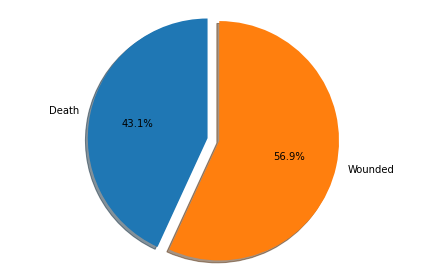

In [42]:
# Pie chart
labels = ['Death', 'Wounded']
sizes = [43.141835328683385, 56.85816467131662]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [43]:
no_k_no_w = terror[(terror['Killed'] == 0) & (terror['Wounded']==0)]
no_k_no_w.size

1265760

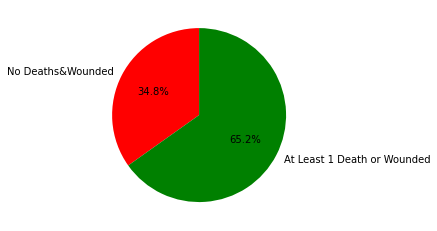

In [44]:
size1 = no_k_no_w.size
size2 = terror.size - size1
pie = [size1, size2]
labels = ['No Deaths&Wounded', 'At Least 1 Death or Wounded']
colors = ['r', 'g']
plt.pie(pie, labels=labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [45]:
pp.ProfileReport(terror)

findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans.


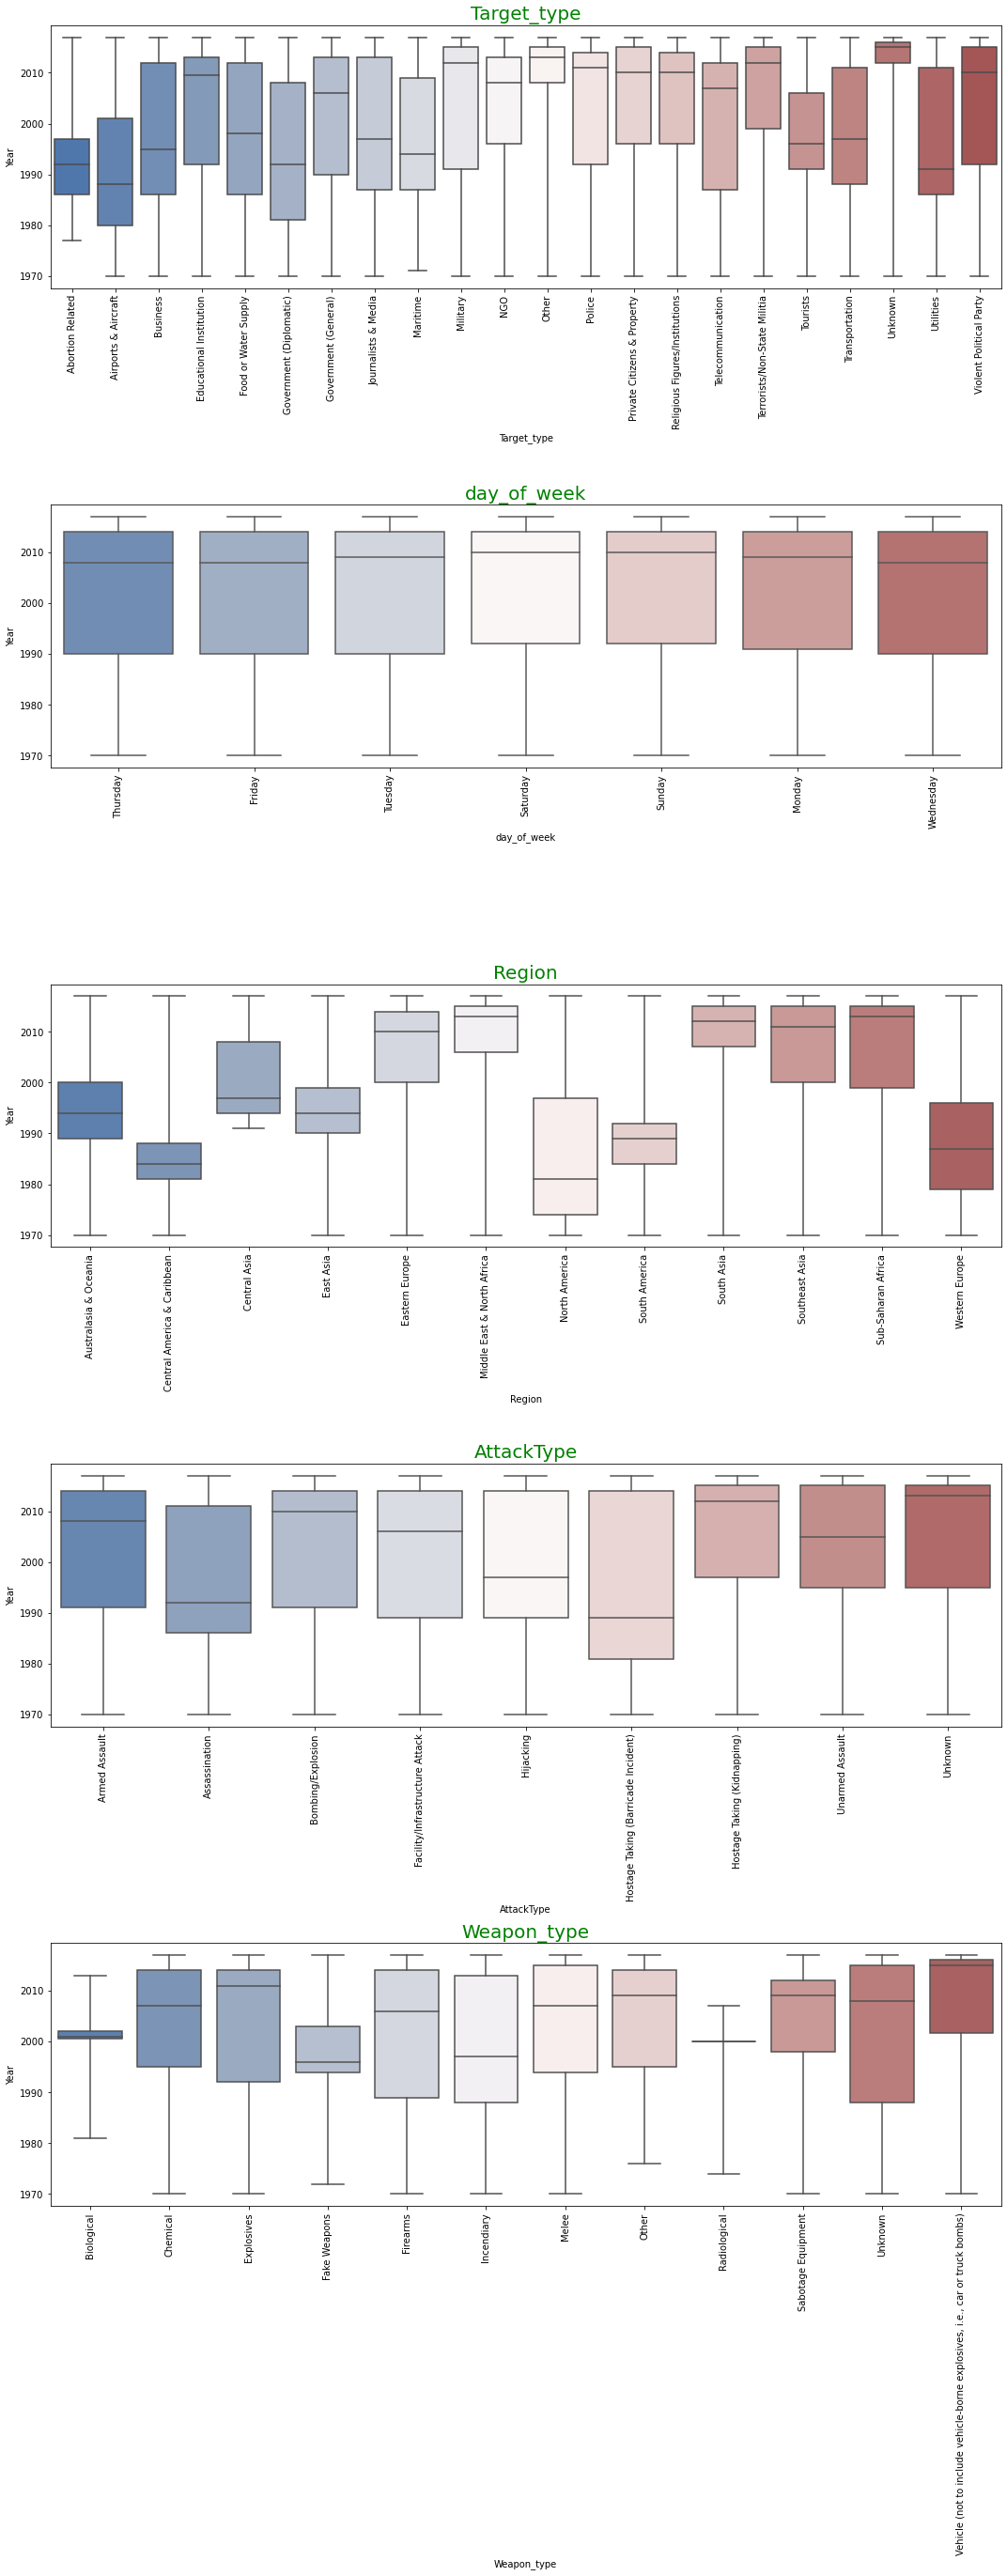

In [46]:
title_style = {'family': 'Century Gothic', 'color': 'green', 'size': 20 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 25}
values = {'AttackType':1,'Target_type':2, 'day_of_week':3,   'Region':4,   'AttackType':5,   'Weapon_type':6 }
plt.figure(figsize=(15,45))

for value, i in values.items():
    plt.subplot(6,1,i)
    sns.boxplot(x=value, y="Year", data=terror,
            whis=[0, 100], palette="vlag")
    plt.xticks(rotation = 90)
    plt.title(value ,fontdict = title_style)
plt.tight_layout()
plt.show()


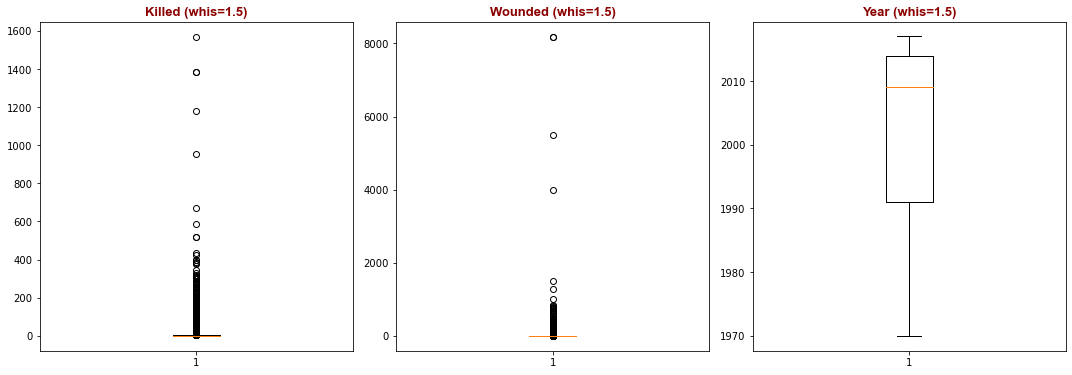

In [47]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(15,15))


plt.subplot(3,3,1)
plt.boxplot(terror.Killed.dropna())
plt.title("Killed (whis=1.5)", fontdict=title_font)


plt.subplot(3,3,2)
plt.boxplot(terror.Wounded.dropna())
plt.title("Wounded (whis=1.5)", fontdict=title_font)


plt.subplot(3,3,3)
plt.boxplot(terror.Year.dropna())
plt.title("Year (whis=1.5)", fontdict=title_font)

plt.tight_layout()

plt.show()

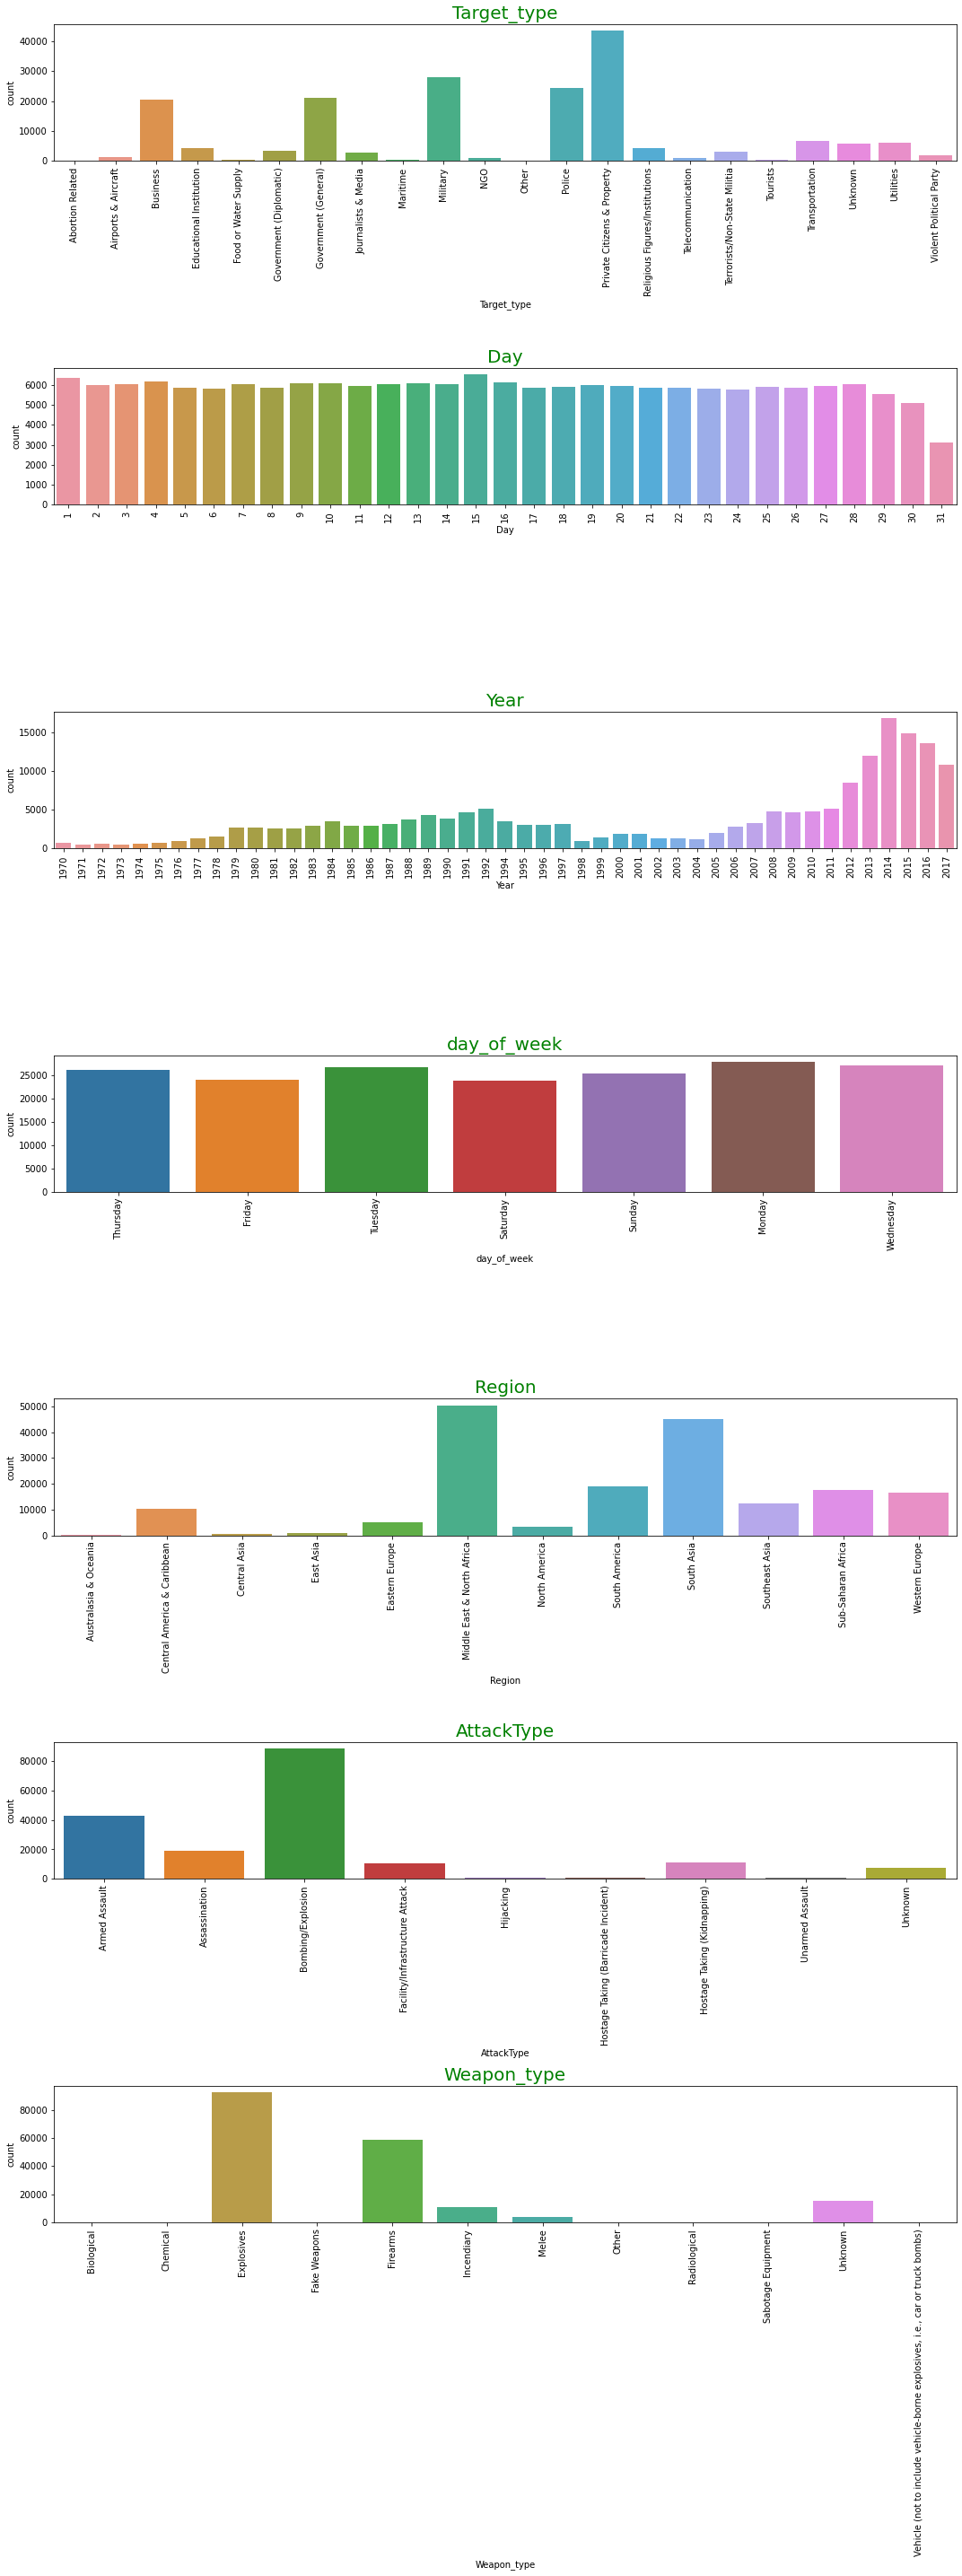

In [48]:
title_style = {'family': 'Century Gothic', 'color': 'green', 'size': 20 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 25}
values = {'AttackType':1,'Target_type':2, 'Day':3,  'Year':4,  'day_of_week':5,   'Region':6,   'AttackType':7,   'Weapon_type':8}
plt.figure(figsize=(15,45))

for value, i in values.items():
    plt.subplot(8,1,i)
    ax = sns.countplot(x=value, data=terror)
    plt.xticks(rotation = 90)
    plt.title(value ,fontdict = title_style)
plt.tight_layout()
plt.show()

#dosent make a sense. im gonna use dependent plots.

Text(0.5, 1.0, 'Correlation Matrix (Data)')

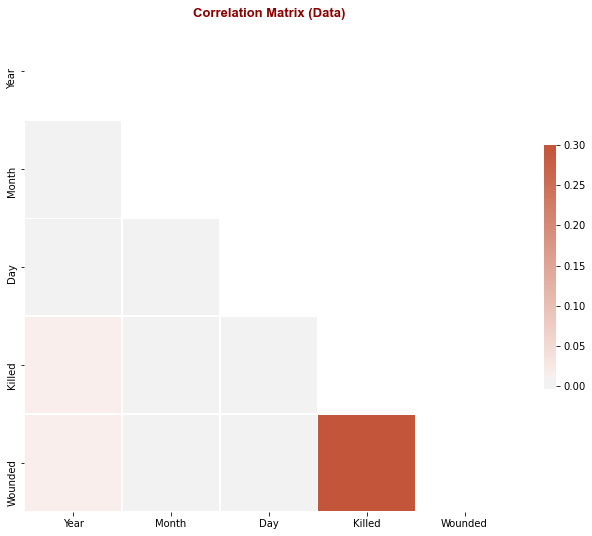

In [49]:
a = terror.corr()
mask = np.triu(np.ones_like(a, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(a, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix (Data)", fontdict=title_font)


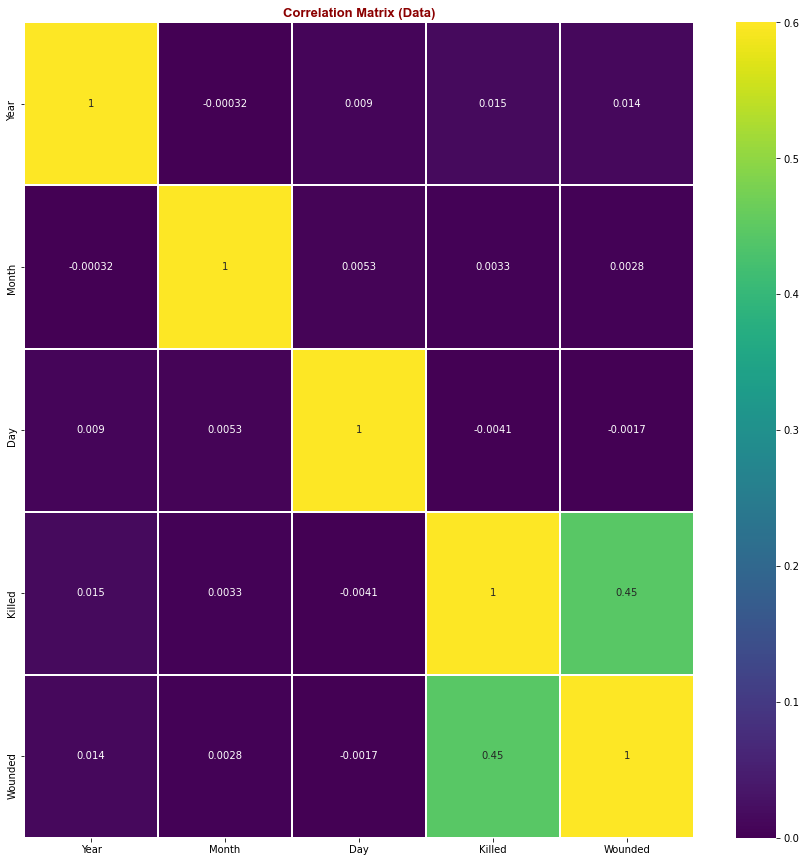

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(a, annot=True, annot_kws={"size": 10}, linewidths=1, vmin=0, vmax=0.6, cmap='viridis')
plt.title("Correlation Matrix (Data)", fontdict=title_font)
plt.show()

# 5. Global Terror Attacks #

### Does weapon type depend on regions?

In [51]:
weapon_cross = pd.crosstab(terror["Weapon_type"], terror["Region"])
weapon_cross



Region                                              Australasia & Oceania  \
Weapon_type                                                                 
Biological                                                              0   
Chemical                                                               11   
Explosives                                                             80   
Fake Weapons                                                            0   
Firearms                                                               74   
Incendiary                                                             74   
Melee                                                                  10   
Other                                                                   1   
Radiological                                                            0   
Sabotage Equipment                                                      0   
Unknown                                                                31   
Vehicle (not to include vehicle-borne explosive...                      1   

Region                                              Central America & Caribbean  \
Weapon_type                                                                       
Biological                                                                    0   
Chemical                                                                      2   
Explosives                                                                 3149   
Fake Weapons                                                                  0   
Firearms                                                                   5679   
Incendiary                                                                  435   
Melee                                                                        65   
Other                                                                         0   
Radiological                                                                  0   
Sabotage Equipment                                                            5   
Unknown                                                                    1005   
Vehicle (not to include vehicle-borne explosive...                            4   

Region                                              Central Asia  East Asia  \
Weapon_type                                                                   
Biological                                                     0          2   
Chemical                                                       2         17   
Explosives                                                   254        333   
Fake Weapons                                                   1          4   
Firearms                                                     232         41   
Incendiary                                                    15        252   
Melee                                                         14         82   
Other                                                          0          3   
Radiological                                                   0         10   
Sabotage Equipment                                             0          3   
Unknown                                                       45         47   
Vehicle (not to include vehicle-borne explosive...             0          8   

Region                                              Eastern Europe  \
Weapon_type                                                          
Biological                                                       0   
Chemical                                                        12   
Explosives                                                    3088   
Fake Weapons                                                     4   
Firearms                                                      1461   
Incendiary                                                     186   
Melee                                                           90   
Other                

In [52]:

print(stats.chisquare(weapon_cross, axis=None))

Power_divergenceResult(statistic=1728169.166648319, pvalue=0.0)


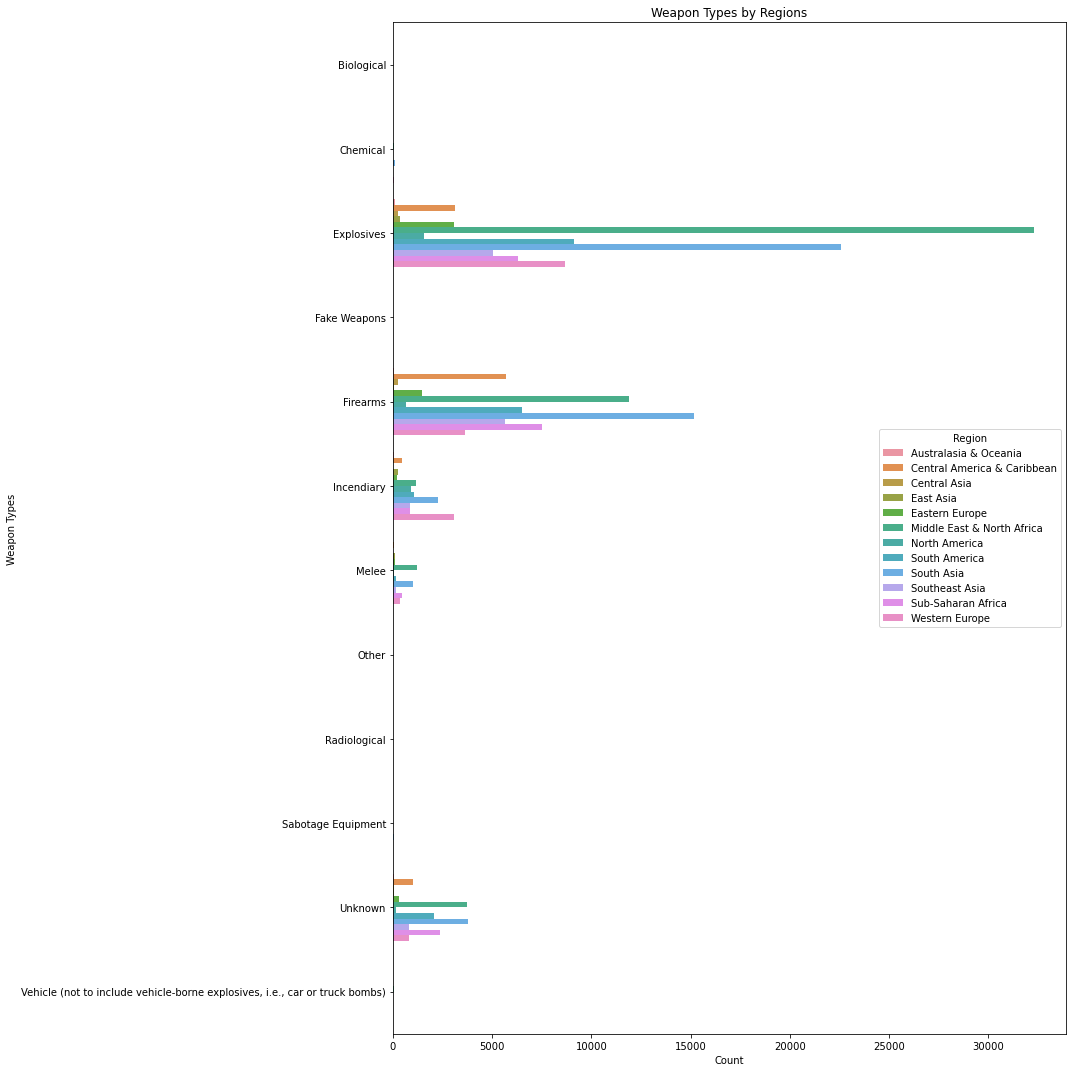

In [53]:
plt.figure(figsize=(15,15))
sns.countplot(y="Weapon_type", hue="Region", data=terror)
plt.title("Weapon Types by Regions")
plt.ylabel("Weapon Types")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

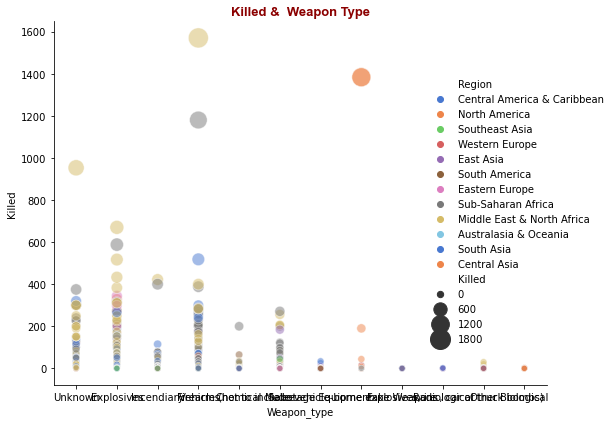

In [54]:
sns.relplot(y="Killed", x="Weapon_type", hue="Region", size="Killed",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=terror)
plt.title("Killed &  Weapon Type", fontdict=title_font)
plt.tight_layout()
plt.show()

### How many people loose their lives every year? ###


In [55]:
terror['date'] = pd.to_datetime(terror['date'])
k_by_year = terror.groupby('date')['Killed'].sum().reset_index()


In [56]:
terror['date'] = pd.to_datetime(terror['date'])
k_by_year = k_by_year.set_index('date')

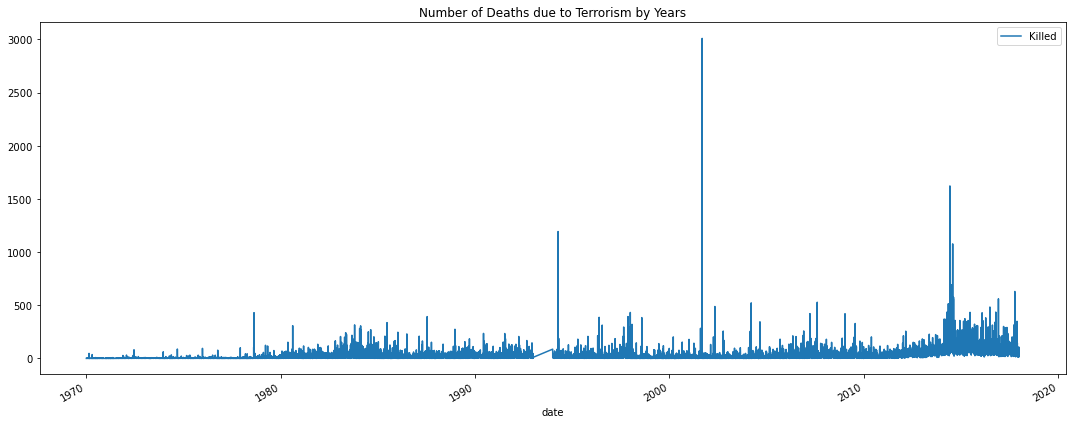

In [57]:
k_by_year.plot(figsize=(15, 6))
plt.title("Number of Deaths due to Terrorism by Years")
plt.tight_layout()
plt.show()

In [58]:
rsample_k_by_year = k_by_year['Killed'].resample('MS').mean()

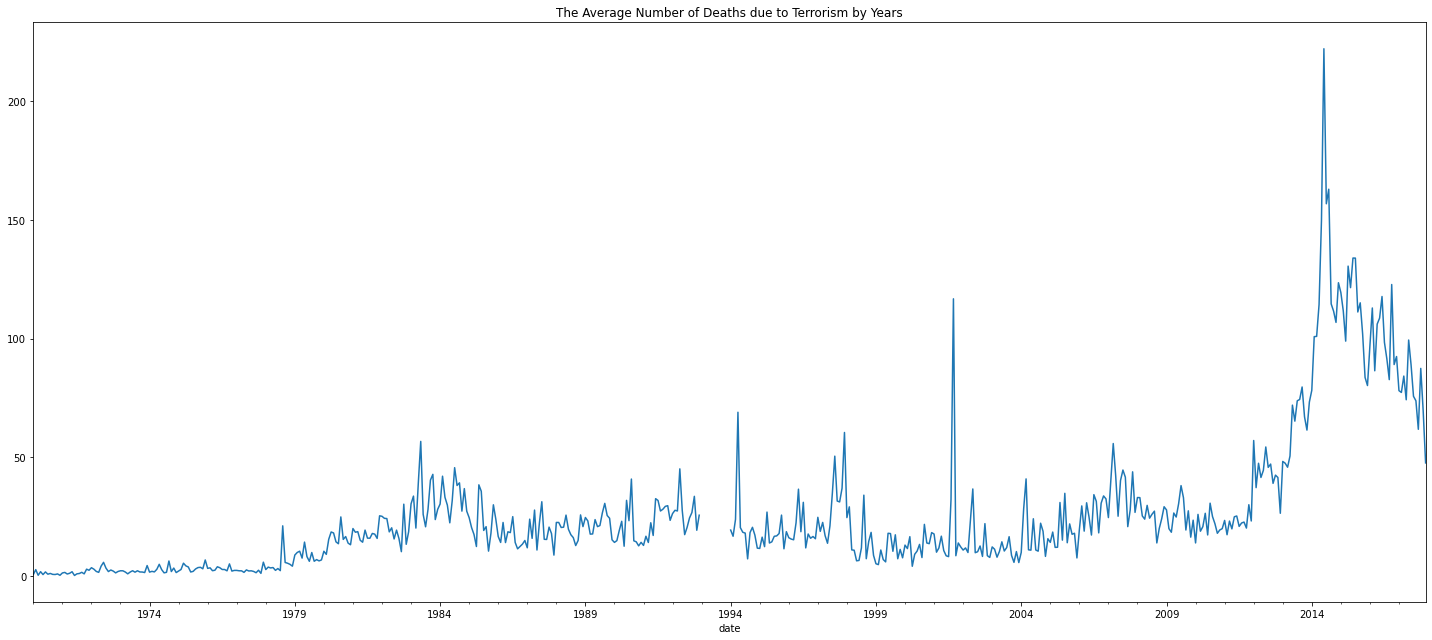

In [59]:
rsample_k_by_year.plot(figsize=(20, 9))
plt.title("The Average Number of Deaths due to Terrorism by Years")
plt.tight_layout()
plt.show()

### The Ratio of Yearly Deaths to Total Deaths

In [60]:
k_by_year_1 = terror.groupby('Year')['Killed'].sum().reset_index()
k_by_year_1 = k_by_year_1.set_index('Year')

In [61]:
k_by_year_1.columns = ['Killed']
k_by_year_1 = k_by_year_1.reset_index()
k_by_year_1


Year        Killed
0   1970    274.943868
1   1971    326.819228
2   1972    671.750719
3   1973    487.767846
4   1974    678.398675
5   1975    982.320666
6   1976    935.973373
7   1977    768.445307
8   1978   1826.724092
9   1979   3073.387302
10  1980   5479.944872
11  1981   6432.453938
12  1982   7063.547200
13  1983  11595.065766
14  1984  12108.363551
15  1985   8151.507192
16  1986   5886.898241
17  1987   6707.921991
18  1988   7284.909614
19  1989   8233.716465
20  1990   7162.420553
21  1991   8678.956245
22  1992   9797.278785
23  1994   7901.501438
24  1995   6115.017127
25  1996   7102.995250
26  1997  11085.029504
27  1998   4839.415803
28  1999   3513.171272
29  2000   4539.995250
30  2001   7779.471934
31  2002   4833.841105
32  2003   3365.068509
33  2004   5779.051382
34  2005   6374.261658
35  2006   9584.291162
36  2007  12928.750719
37  2008   9313.222653
38  2009   9316.261658
39  2010   7839.017127
40  2011   8313.295912
41  2012  15996.912491
42  2013  23116.602328
43  2014  46946.300797
44  2015  40787.757477
45  2016  36740.864990
46  2017  27923.106644

In [62]:
Total = k_by_year_1['Killed'].sum()
print (Total)

436644.71968021366


In [63]:
k_by_year_1['Ratio'] = k_by_year_1['Killed']/ Total
k_by_year_1

Year        Killed     Ratio
0   1970    274.943868  0.000630
1   1971    326.819228  0.000748
2   1972    671.750719  0.001538
3   1973    487.767846  0.001117
4   1974    678.398675  0.001554
5   1975    982.320666  0.002250
6   1976    935.973373  0.002144
7   1977    768.445307  0.001760
8   1978   1826.724092  0.004184
9   1979   3073.387302  0.007039
10  1980   5479.944872  0.012550
11  1981   6432.453938  0.014732
12  1982   7063.547200  0.016177
13  1983  11595.065766  0.026555
14  1984  12108.363551  0.027730
15  1985   8151.507192  0.018669
16  1986   5886.898241  0.013482
17  1987   6707.921991  0.015362
18  1988   7284.909614  0.016684
19  1989   8233.716465  0.018857
20  1990   7162.420553  0.016403
21  1991   8678.956245  0.019876
22  1992   9797.278785  0.022438
23  1994   7901.501438  0.018096
24  1995   6115.017127  0.014005
25  1996   7102.995250  0.016267
26  1997  11085.029504  0.025387
27  1998   4839.415803  0.011083
28  1999   3513.171272  0.008046
29  2000   4539.995250  0.010397
30  2001   7779.471934  0.017816
31  2002   4833.841105  0.011070
32  2003   3365.068509  0.007707
33  2004   5779.051382  0.013235
34  2005   6374.261658  0.014598
35  2006   9584.291162  0.021950
36  2007  12928.750719  0.029609
37  2008   9313.222653  0.021329
38  2009   9316.261658  0.021336
39  2010   7839.017127  0.017953
40  2011   8313.295912  0.019039
41  2012  15996.912491  0.036636
42  2013  23116.602328  0.052941
43  2014  46946.300797  0.107516
44  2015  40787.757477  0.093412
45  2016  36740.864990  0.084144
46  2017  27923.106644  0.063949

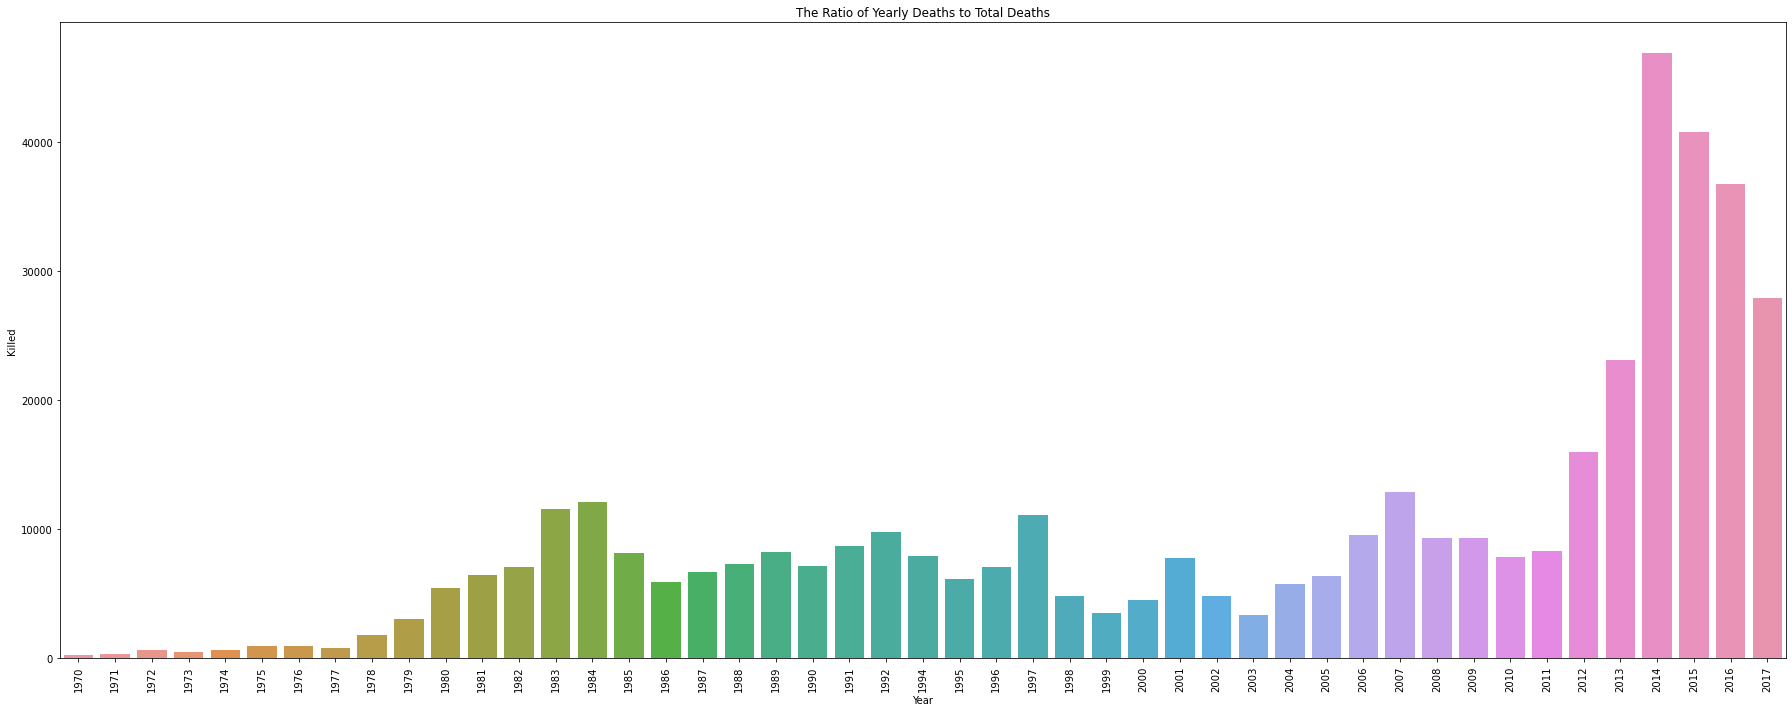

In [64]:
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Year', y = 'Killed', data = k_by_year_1)
plt.title("The Ratio of Yearly Deaths to Total Deaths")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### The Ratio Between Attacks and Deaths 

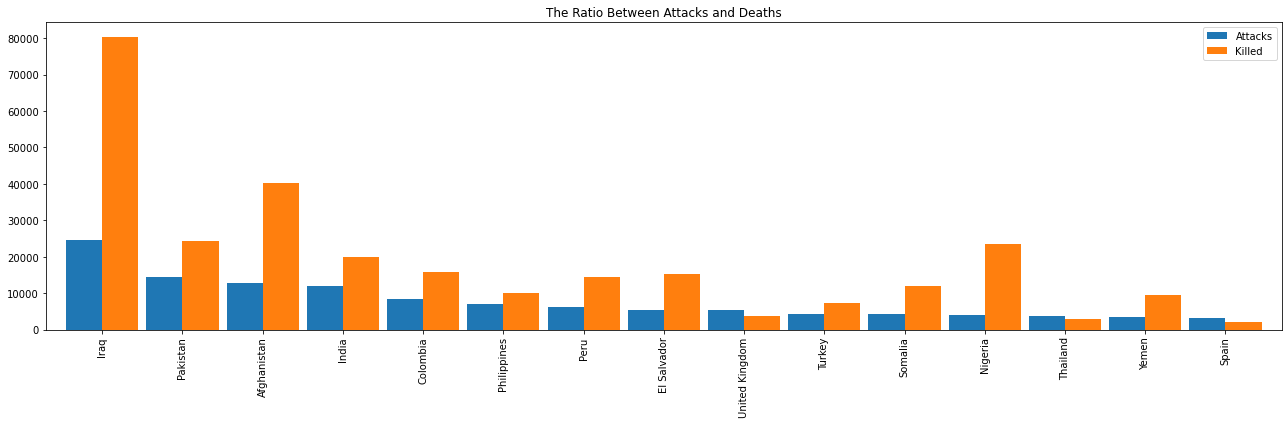

In [65]:
coun_terror=terror['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
plt.title("The Ratio Between Attacks and Deaths")
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.tight_layout()
plt.show()

In [66]:
terror_iq=terror[terror['Country']=='Iraq']
terror_pk=terror[terror['Country']=='Pakistan']
terror_sp=terror[terror['Country']=='Spain']

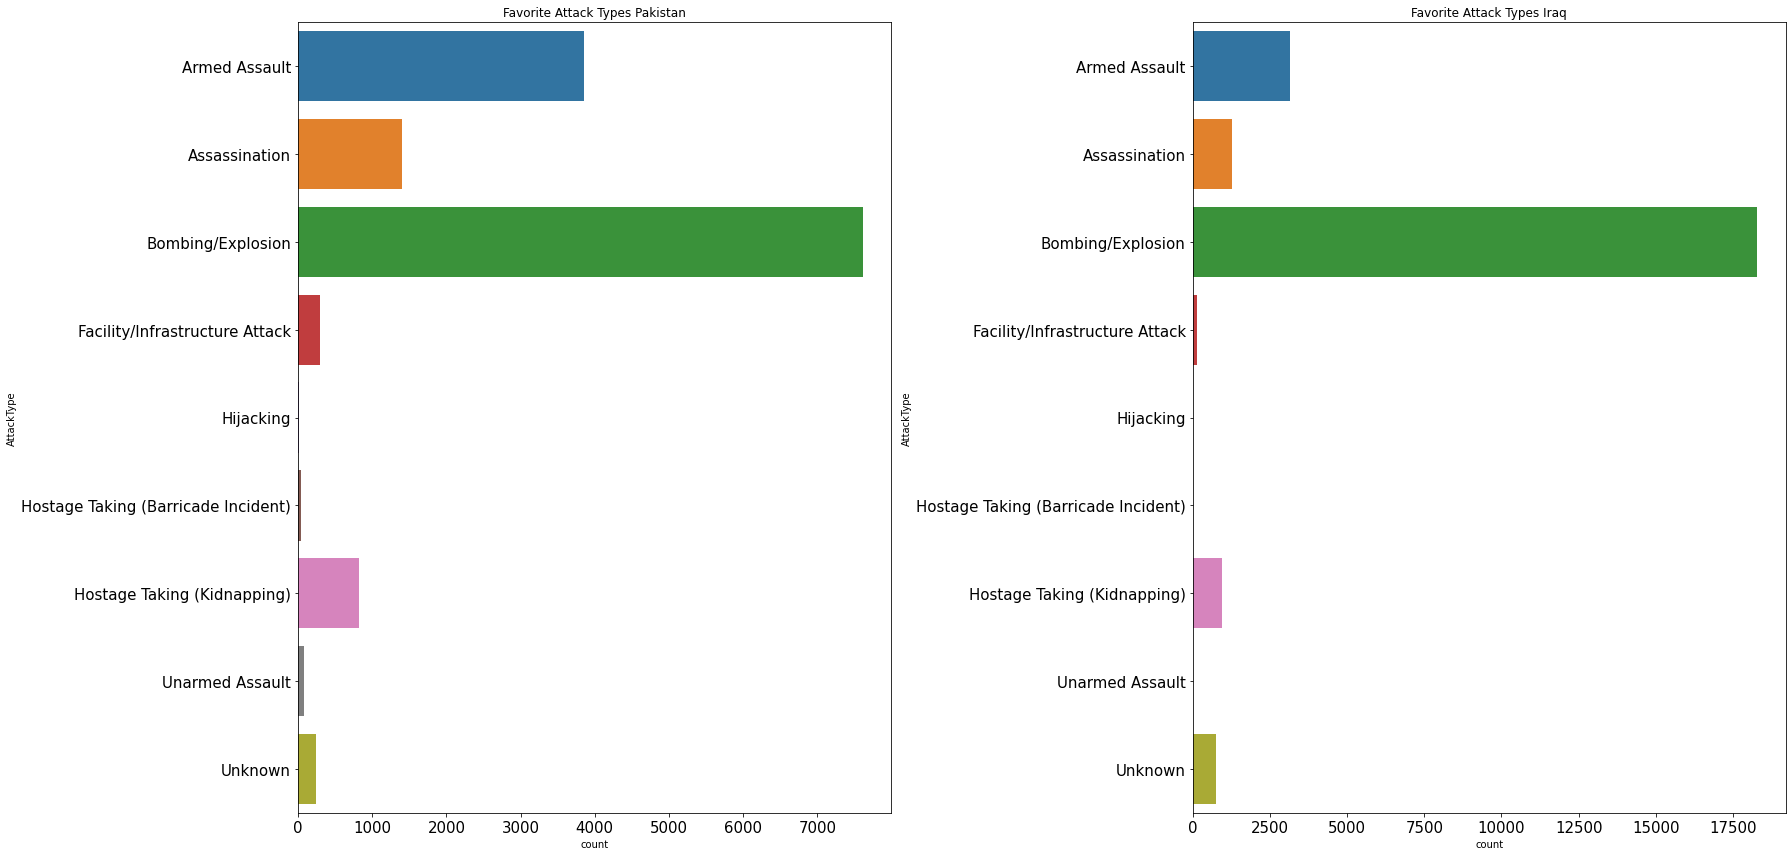

In [67]:
f,ax=plt.subplots(1,2,figsize=(25,12))
sns.countplot(y='AttackType',data=terror_pk,ax=ax[0])
ax[0].set_title('Favorite Attack Types')
ax[0].set_title('Favorite Attack Types Pakistan')

sns.countplot(y='AttackType',data=terror_iq,ax=ax[1])
ax[1].set_title('Favorite Attack Types Iraq')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.tight_layout()
plt.show()

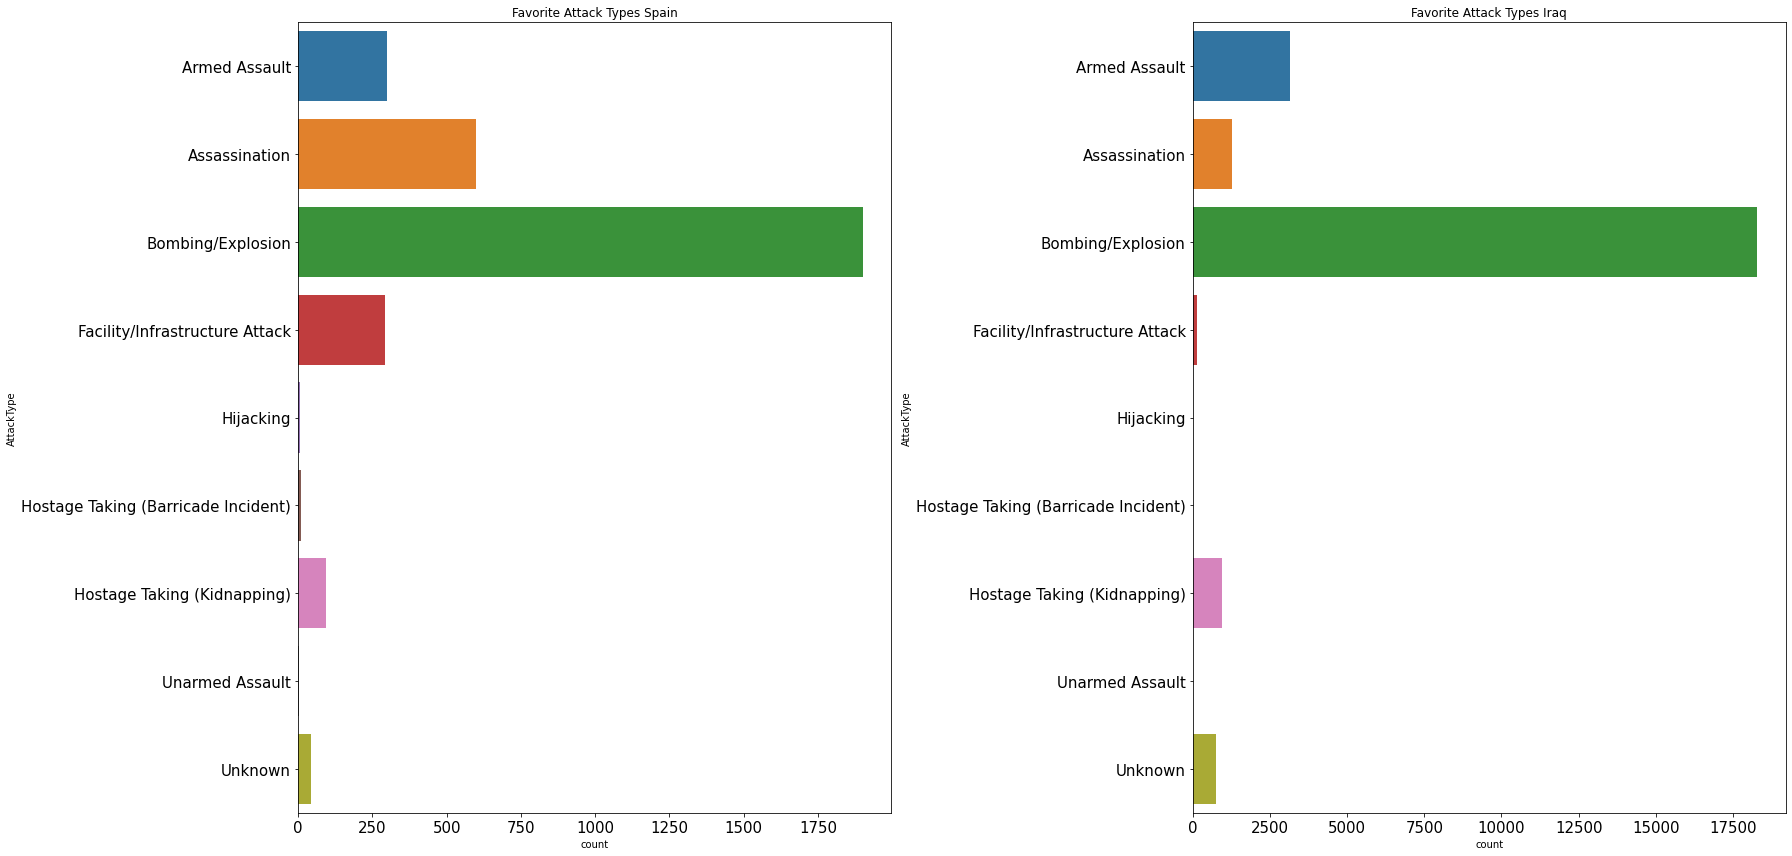

In [68]:
f,ax=plt.subplots(1,2,figsize=(25,12))
sns.countplot(y='AttackType',data=terror_sp,ax=ax[0])
ax[0].set_title('Favorite Attack Types')
ax[0].set_title('Favorite Attack Types Spain')

sns.countplot(y='AttackType',data=terror_iq,ax=ax[1])
ax[1].set_title('Favorite Attack Types Iraq')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.tight_layout()
plt.show()

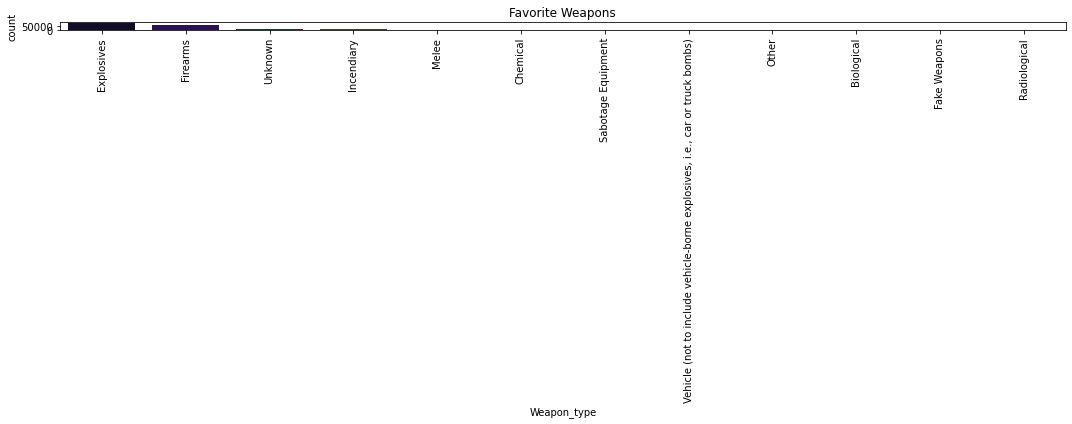

In [69]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Weapon_type'],palette='inferno',order=terror['Weapon_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Weapons')
plt.tight_layout()
plt.show()

### Total Deaths by Regions

In [70]:
general_sum = terror.groupby(by='Region').sum()
a7 = general_sum['Killed']
a7.columns = ['sum']
a7 = a7.reset_index()
a7 

#how many peoople died and where.

Region         Killed
0         Australasia & Oceania     164.420553
1   Central America & Caribbean   34288.753865
2                  Central Asia    1009.613702
3                     East Asia    1245.733592
4                Eastern Europe    7813.968623
5    Middle East & North Africa  143104.986018
6                 North America    5139.518566
7                 South America   32867.527331
8                    South Asia  103570.009634
9                Southeast Asia   16296.345421
10           Sub-Saharan Africa   82260.321804
11               Western Europe    8883.520573

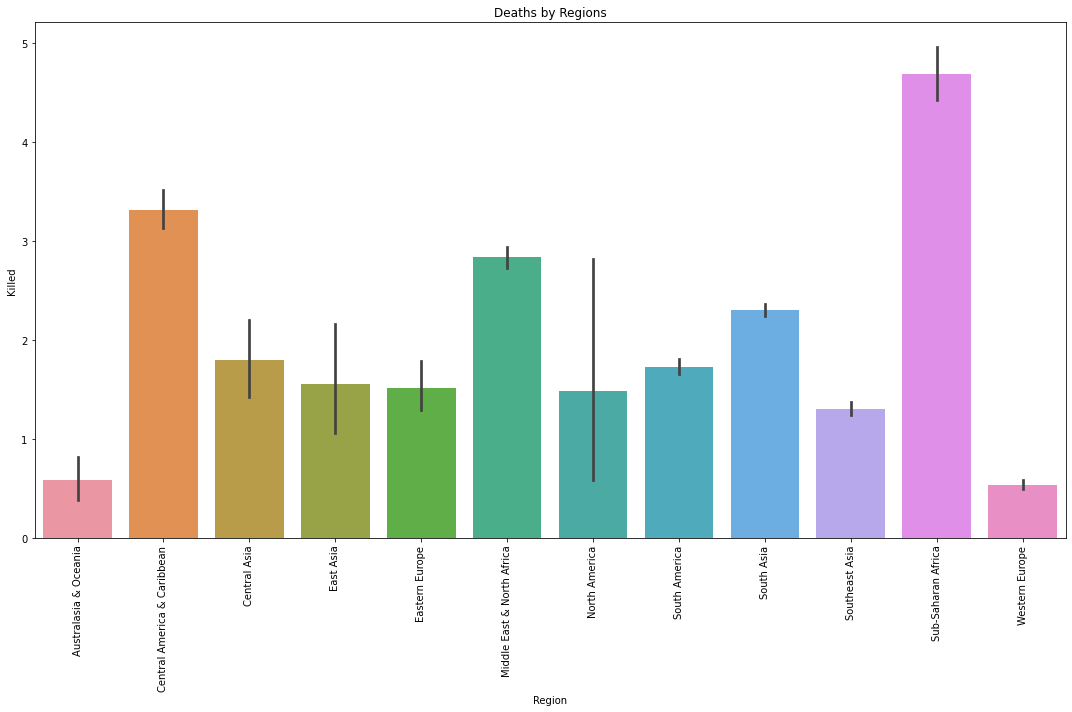

In [71]:

plt.figure(figsize=(15,10))
sns.barplot(x = 'Region', y = 'Killed', data = terror)
plt.title('Deaths by Regions')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

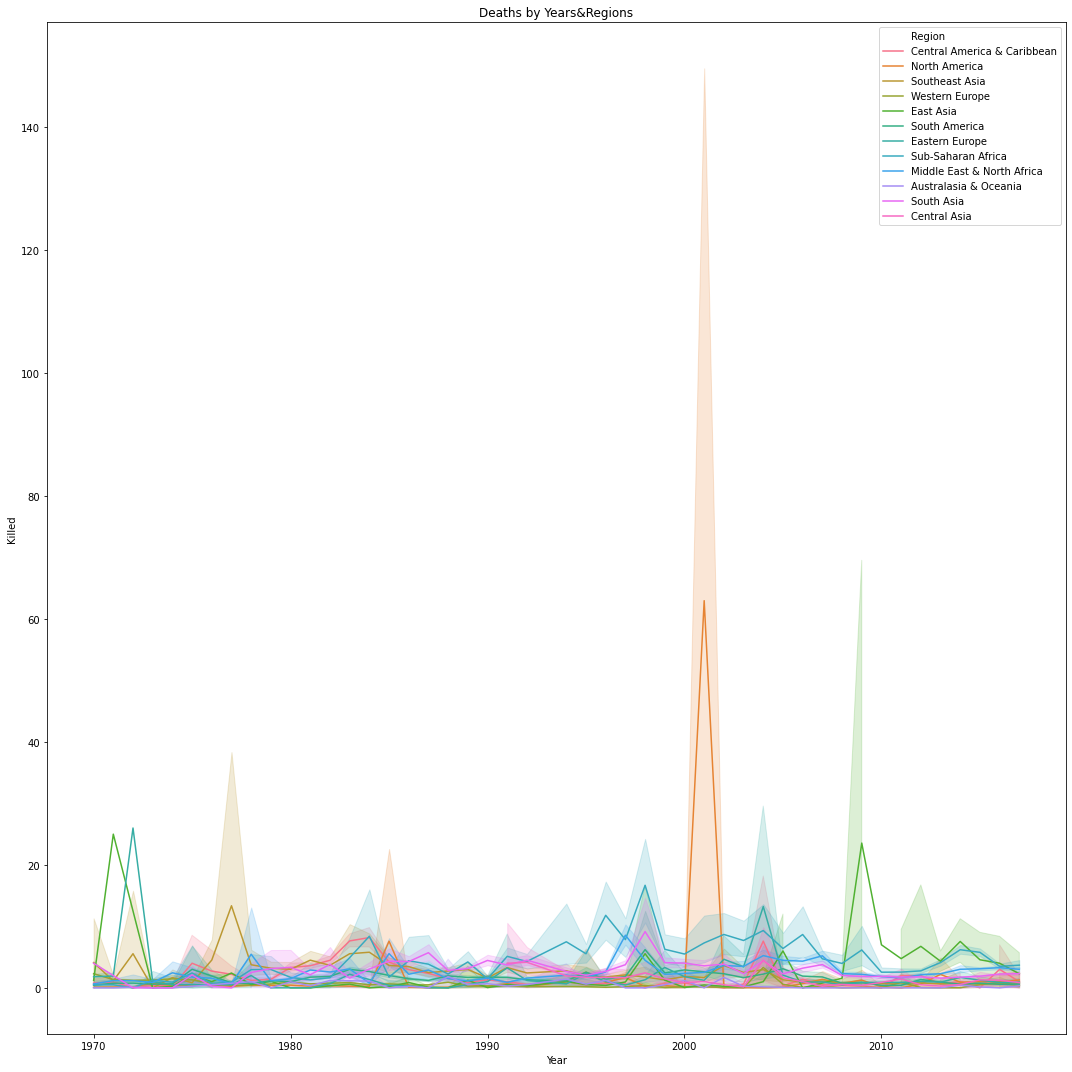

In [72]:
plt.figure(figsize=(15, 15))
sns.lineplot(x = 'Year', y = 'Killed', data = terror, hue = 'Region')
plt.title('Deaths by Years&Regions')
plt.tight_layout()
plt.show()

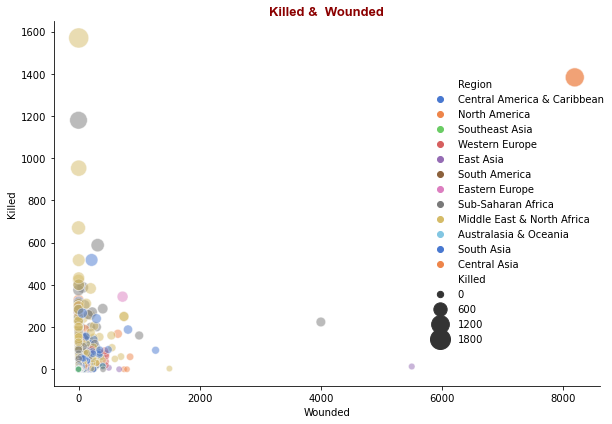

In [73]:
sns.relplot(x="Wounded", y="Killed", hue="Region", size="Killed",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=terror)
plt.title("Killed &  Wounded", fontdict=title_font)
plt.tight_layout()
plt.show()

In [74]:
# Test whether group differences are significant.
d_region = terror["Region"].unique()
reg_group = terror.groupby("Region")

In [75]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["Killed", "Wounded"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(d_region)):
        for j in range(i+1, len(d_region)):
            ttest = stats.ttest_ind(terror[terror["Region"]==d_region[i]][var], 
                                terror[terror["Region"]==d_region[j]][var])
            grup_1 = d_region[i]
            grup_2 = d_region[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

Killed için karşılaştırma

grup_1          grup_2         istatistik  \
0   Central America & Caribbean   North America  4.836147972716796   
1   Central America & Caribbean  Southeast Asia 20.188932199159648   
2   Central America & Caribbean  Western Europe 32.764985751524833   
3   Central America & Caribbean       East Asia  4.752374126421586   
4   Central America & Caribbean   South America 17.512798601785317   
..                          ...             ...                ...   
61   Middle East & North Africa      South Asia  7.763581181936396   
62   Middle East & North Africa    Central Asia  1.909284559547924   
63        Australasia & Oceania      South Asia -4.107614999215370   
64        Australasia & Oceania    Central Asia -4.191669392919231   
65                   South Asia    Central Asia  1.715627642762500   

            p_degeri  
0  0.000001338080151  
1  0.000000000000000  
2  0.000000000000000  
3  0.000002035551371  
4  0.000000000000000  
..               ...  
61 0.000000000000008  
62 0.056230995016744  
63 0.000040046795648  
64 0.000030615763381  
65 0.086237018600504  

[66 rows x 4 columns]

Wounded için karşılaştırma

grup_1          grup_2         istatistik  \
0   Central America & Caribbean   North America -2.417600743920901   
1   Central America & Caribbean  Southeast Asia -6.595687123441178   
2   Central America & Caribbean  Western Europe  0.414090786322071   
3   Central America & Caribbean       East Asia -5.180974742417002   
4   Central America & Caribbean   South America  7.058926190075606   
..                          ...             ...                ...   
61   Middle East & North Africa      South Asia 12.099106027912983   
62   Middle East & North Africa    Central Asia  1.213910283781632   
63        Australasia & Oceania      South Asia -2.750546074446619   
64        Australasia & Oceania    Central Asia -1.272808273845969   
65                   South Asia    Central Asia -0.557312620056057   

            p_degeri  
0  0.015636082808667  
1  0.000000000043255  
2  0.678810912479287  
3  0.000000224586527  
4  0.000000000001715  
..               ...  
61 0.000000000000000  
62 0.224787603123785  
63 0.005951966230099  
64 0.203436997223395  
65 0.577316594169910  

[66 rows x 4 columns]

### The attacks that cause the most death

In [76]:
terror.nlargest(10, ['Killed']) 

Year  Month  Day        Country country1                      Region  \
133518  2014      6   12           Iraq       95  Middle East & North Africa   
73126   2001      9   11  United States      217               North America   
73127   2001      9   11  United States      217               North America   
55934   1994      4   13         Rwanda      168          Sub-Saharan Africa   
136283  2014      8    3           Iraq       95  Middle East & North Africa   
133225  2014      6   10           Iraq       95  Middle East & North Africa   
179671  2017     10   14        Somalia      182          Sub-Saharan Africa   
76347   2004      3   21          Nepal      141                  South Asia   
136746  2014      8   19          Syria      200  Middle East & North Africa   
170198  2016     12   10          Syria      200  Middle East & North Africa   

       Region1              city                   AttackType attacktype1  \
133518      10            Tikrit  Hostage Taking (Kidnapping)           6   
73126        1     New York City                    Hijacking           4   
73127        1     New York City                    Hijacking           4   
55934       11            Gikoro                Armed Assault           2   
136283      10            Sinjar  Hostage Taking (Kidnapping)           6   
133225      10            Badush                Armed Assault           2   
179671      11         Mogadishu            Bombing/Explosion           3   
76347        6  Dhading district                Armed Assault           2   
136746      10           Unknown  Hostage Taking (Kidnapping)           6   
170198      10           Palmyra  Hostage Taking (Kidnapping)           6   

                     Killed              Wounded  \
133518 1570.000000000000000    3.167483037625630   
73126  1384.000000000000000 8190.000000000000000   
73127  1383.000000000000000 8191.000000000000000   
55934  1180.000000000000000    0.000000000000000   
136283  953.000000000000000    3.167483037625630   
133225  670.000000000000000    0.000000000000000   
179671  588.000000000000000  316.000000000000000   
76347   518.000000000000000  216.000000000000000   
136746  517.000000000000000    3.167483037625630   
170198  433.000000000000000    3.167483037625630   

                                                   Target  \
133518                                           Soldiers   
73126   Passengers and crew members on American Airlin...   
73127   Passengers and crew members on United Airlines...   
55934      Group of Tutsi Refugees inside Catholic Church   
136283                                   Yizidi Civilians   
133225                                      Badush Prison   
179671                                              Hotel   
76347   Government infrastructure in the town of Bedi,...   
136746                                      Tabqa Airbase   
170198                                               City   

                                                  Summary  \
133518  06/12/2014: Assailants abducted approximately ...   
73126   09/11/2001: This was one of four related attac...   
73127   09/11/2001: This was one of four related attac...   
55934                                             nothing   
136283  08/03/2014: Assailants attacked Yizidi civilia...   
133225  06/10/2014: Assailants stormed Badush prison i...   
179671  10/14/2017: A suicide bomber detonated an expl...   
76347   03/21/2004: Nepalese Communist Party (Maoist) ...   
136746  08/19/2014: Assailants attacked Tabqa Air Base...   
170198  12/10/2016: Assailants, including suicide bomb...   

                                              Group  \
133518  Islamic State of Iraq and the Levant (ISIL)   
73126                                      Al-Qaida   
73127                                      Al-Qaida   
55934                               Hutu extremists   
136283  Islamic State of Iraq and the Levant (ISIL)   
133225  Islamic State of Iraq an

### Total Deaths by Regions&Days

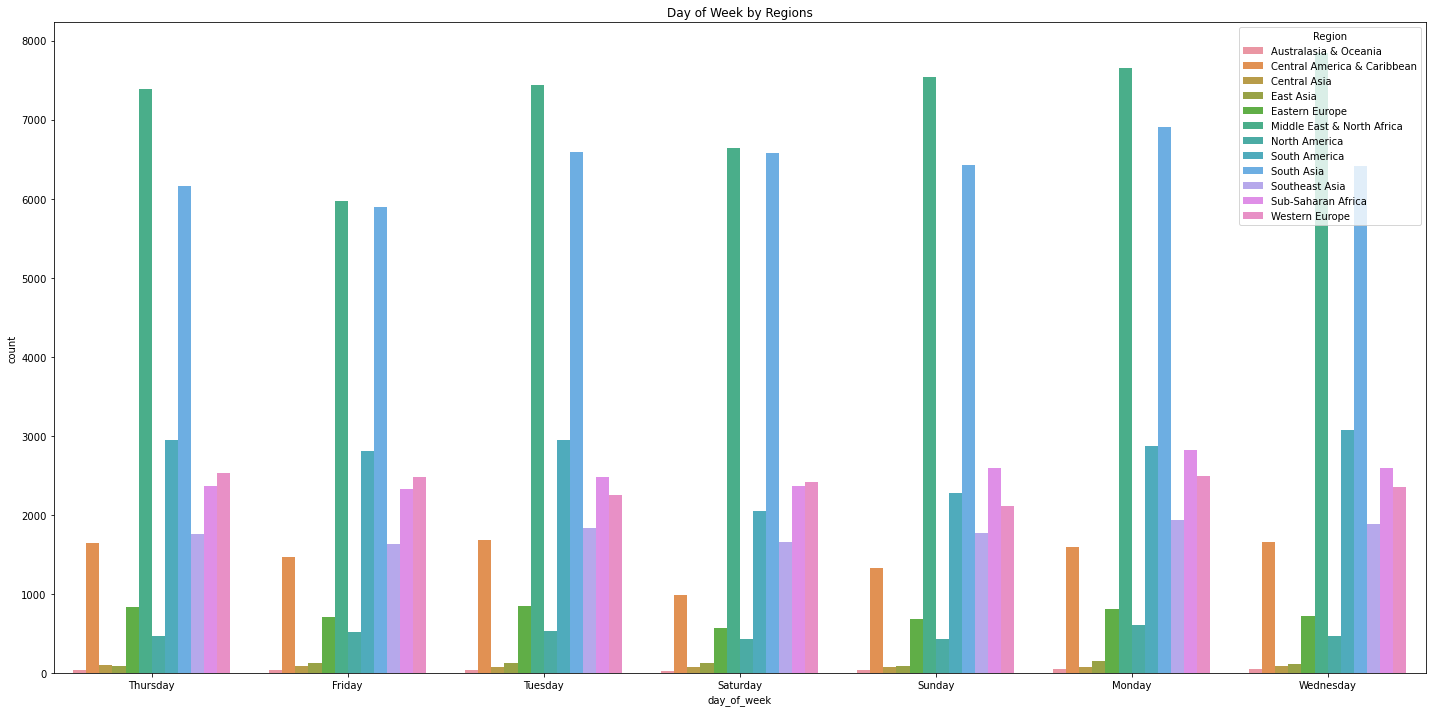

In [77]:
plt.figure(figsize=(20,10))
sns.countplot(x="day_of_week", hue="Region", data=terror)
plt.title("Day of Week by Regions")
plt.tight_layout()
plt.show()

In [78]:
a1 = terror.groupby(by='day_of_week').agg(['count'])
a2 = a1['Region']
a2.columns = ['count']
a2 = a2.reset_index()
a2 #how many attacks happened.

day_of_week  count
0      Friday  24065
1      Monday  27981
2    Saturday  23915
3      Sunday  25343
4    Thursday  26291
5     Tuesday  26846
6   Wednesday  27235

### Friday& Saturday : Do worship days affect terrorism?

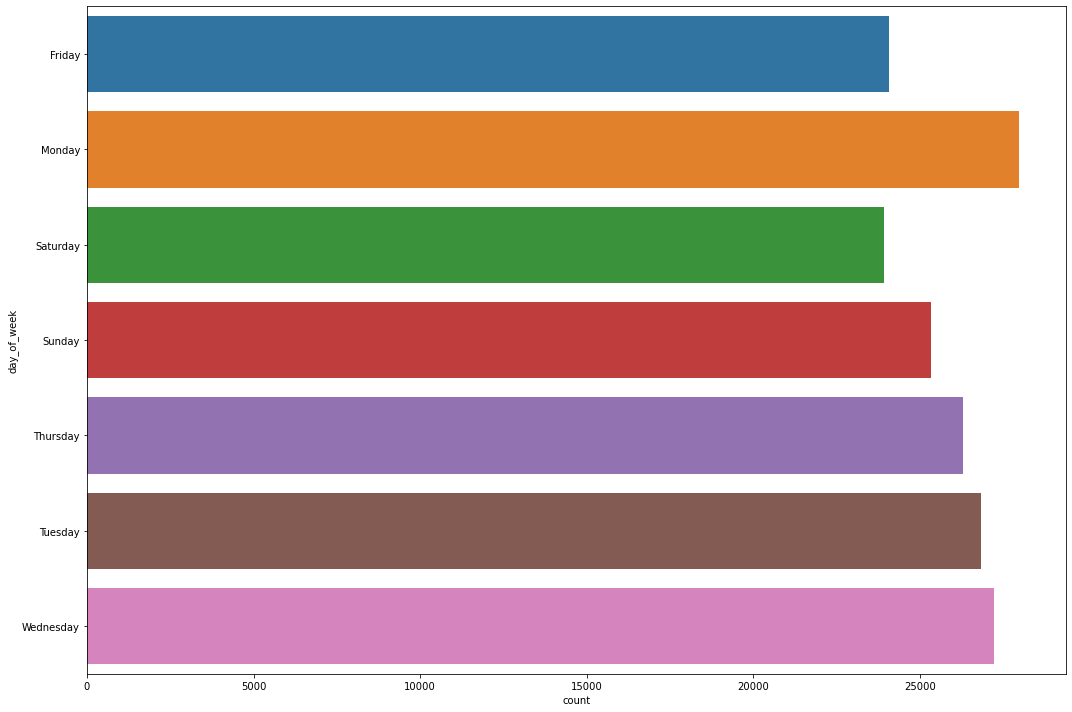

In [79]:

plt.figure(figsize=(15,10))
sns.barplot(y = 'day_of_week', x = 'count', data = a2)
plt.tight_layout()
plt.show()
#how many attacks happened.

### Attack Types by Groups

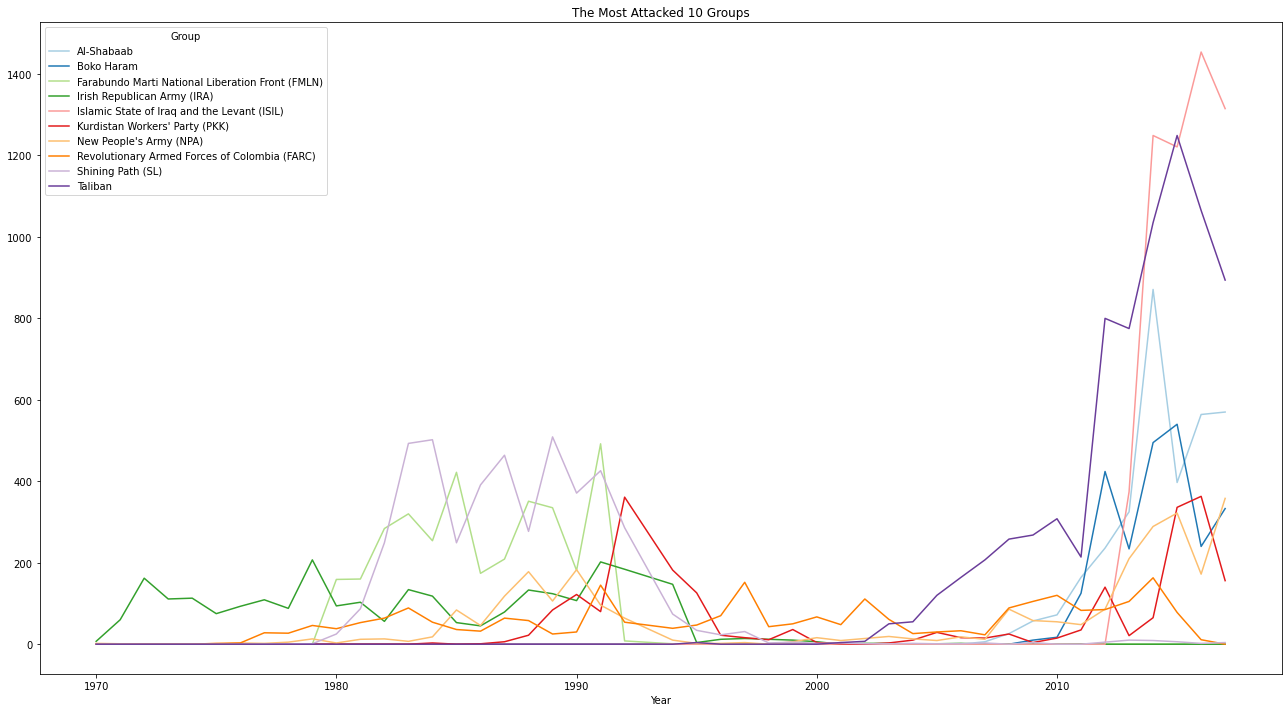

In [80]:
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,10)
plt.title('The Most Attacked 10 Groups')
plt.tight_layout()
plt.show()

In [81]:
terror['Group'].value_counts()[:10].sort_values(ascending=False)

Unknown                                             82777
Taliban                                              7477
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64

In [82]:
top_1 = terror[terror['Group'].isin(['Taliban', 'Islamic State of Iraq and the Levant (ISIL)', 'Shining Path (SL)',"New People's Army (NPA)",'Al-Shabaab ', 'Farabundo Marti National Liberation Front (FMLN)'])]

In [83]:
top_1

Year  Month  Day      Country country1                      Region  \
39      1970      1   31  Philippines      160              Southeast Asia   
169     1970      4    2  Philippines      160              Southeast Asia   
739     1971      3    3  Philippines      160              Southeast Asia   
3611    1976      2   20  Philippines      160              Southeast Asia   
3614    1976      2   21  Philippines      160              Southeast Asia   
...      ...    ...  ...          ...      ...                         ...   
181671  2017     12   31         Iraq       95  Middle East & North Africa   
181674  2017     12   31         Iraq       95  Middle East & North Africa   
181676  2017     12   31  Afghanistan        4                  South Asia   
181679  2017     12   31         Iraq       95  Middle East & North Africa   
181683  2017     12   31  Afghanistan        4                  South Asia   

       Region1                    city                      AttackType  \
39           5                  Bamban                         Unknown   
169          5          Mabalacat City                         Unknown   
739          5                  Tarlas               Bombing/Explosion   
3611         5                 Unknown  Facility/Infrastructure Attack   
3614         5                 Unknown                   Armed Assault   
...        ...                     ...                             ...   
181671      10              Farhatiyah               Bombing/Explosion   
181674      10                    Baaj                         Unknown   
181676       6  Mohammad Agha district               Bombing/Explosion   
181679      10              Muqdadiyah                   Armed Assault   
181683       6       Kohistan district                   Armed Assault   

       attacktype1             Killed           Wounded  \
39               9  0.000000000000000 1.000000000000000   
169              9  2.000000000000000 0.000000000000000   
739              3  0.000000000000000 0.000000000000000   
3611             7  2.403425436932863 3.167483037625630   
3614             2  8.000000000000000 0.000000000000000   
...            ...                ...               ...   
181671           3  4.000000000000000 9.000000000000000   
181674           9  5.000000000000000 0.000000000000000   
181676           3  5.000000000000000 0.000000000000000   
181679           2 13.000000000000000 0.000000000000000   
181683           2  6.000000000000000 0.000000000000000   

                             Target  \
39                           Seaman   
169                          Airmen   
739     Navy Communications Antenna   
3611        Construction company HQ   
3614                military convoy   
...                             ...   
181671                    Civilians   
181674                       Troops   
181676                      Vehicle   
181679                         Post   
181683              House of Member   

                                                  Summary  \
39                                                nothing   
169                                               nothing   
739                                               nothing   
3611                                              nothing   
3614                                              nothing   
...                                                   ...   
181671  12/31/2017: Assailants attacked civilians in F...   
181674  12/31/2017: Assailants attacked Baaj, Nineveh,...   
181676  12/31/2017: An explosive device detonated targ...   
181679  12/31/2017: Assailants attacked volunteer figh...   
181683  12/31/2017: Assailants attacked the house of a...   

                                              Group  \
39                          New People's Army (NPA)   
169                         New People's Army (NPA)   
739                         New People's Army (NPA)   
3611                        New People's Army (NPA)

In [84]:
a3 = terror.groupby(by='AttackType').agg(['count'])
a4 = a3['Year']
a4.columns = ['count']
a4 = a4.reset_index()
a4

AttackType  count
0                        Armed Assault  42669
1                        Assassination  19310
2                    Bombing/Explosion  88247
3       Facility/Infrastructure Attack  10355
4                            Hijacking    659
5  Hostage Taking (Barricade Incident)    991
6          Hostage Taking (Kidnapping)  11154
7                      Unarmed Assault   1015
8                              Unknown   7276

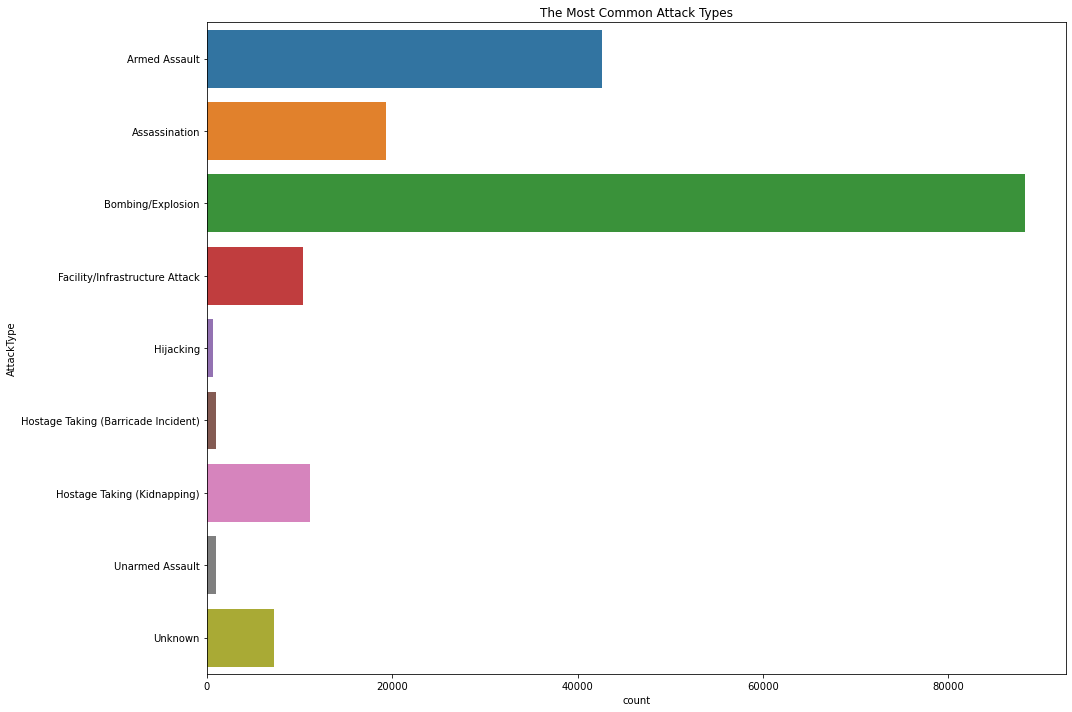

In [85]:

plt.figure(figsize=(15,10))
sns.barplot(y = 'AttackType', x = 'count', data = a4)
plt.title('The Most Common Attack Types')
plt.tight_layout()
plt.show()


### Target Groups

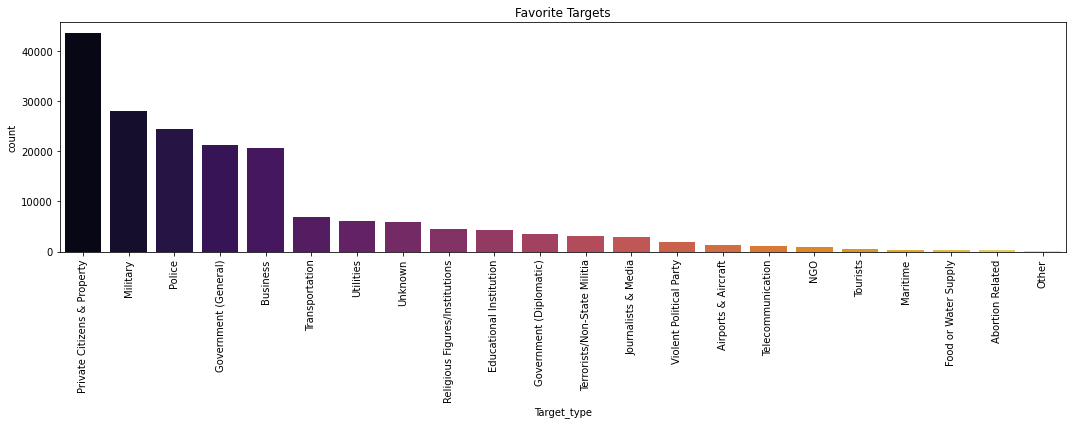

In [86]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.tight_layout()
plt.show()

###  What Motivate People to Do This?

In [87]:
text = terror.Motive.dropna()
print(text.isna().sum())
text = " ".join(str(motive) for motive in terror.Motive )
print ("There are {} words in the combination of all motives.".format(len(text)))

0
There are 5292332 words in the combination of all motives.


In [ ]:


# Create stopword list:
stopwords = set(STOPWORDS)
#add additional stopwords
stopwords.update(["say","NaN","specific" ,"carried","incident","responsibility","claimed","noted","minority", "nothing",
                  "party","Party","noted","attack","motive","source","sources","stated","part","new", "us","The", "specific", "motive", "for",
                  "attack", "is", "unknown", "which", "Unknown", "occured","Occured", "state", "reported", "member", "group", "area", "related", "intended",
                  "larger","trend","may","target","says","call","unknown","nan","NAN","majority","communities","victim", "killed" ,"people", "posited", "accused"])

mask = np.array(Image.open("xxx.png"))

#font = ImageFont.load_default() #font_path= font,
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA",  max_words=100000000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,15])
plt.imshow( wordcloud_usa.recolor(color_func=image_colors),cmap=plt.cm.gist_heat, interpolation="bilinear")
plt.axis("off")
plt.title(" What Motivate People to Do This?")
# store to file 
plt.savefig("motive_word.png", format="png")

plt.show()

